# Exploratory Data Analysis (EDA)

## Mục tiêu

- Kiểm tra thông tin tổng quát của dữ liệu
- Xác định dữ liệu thiếu, lỗi
- Hiểu phân bố các đặc trưng
- Tìm mối liên hệ giữa đặc trưng và biến mục tiêu (`Price`)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
MODEL_DIR = os.getenv("MODEL_DIR", "E:/Project/Backpack Prediction Challenge")
os.makedirs(MODEL_DIR, exist_ok=True)

## Sơ bộ về dữ liệu

In [52]:
df = pd.read_csv(os.path.join(MODEL_DIR, "data/row\data.csv"))
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [54]:
df.shape

(300000, 11)

Dữ liệu có 300.000 dòng và 11 cột

In [55]:
df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [56]:
desc = df.describe().apply(lambda col: col.map('{:,.2f}'.format))
desc

,id,Compartments,Weight Capacity (kg),Price
count,"300,000.00","300,000.00","299,862.00","300,000.00"
mean,"149,999.50",5.44,18.03,81.41
std,"86,602.68",2.89,6.97,39.04
min,0.00,1.00,5.00,15.00
25%,"74,999.75",3.00,12.10,47.38
50%,"149,999.50",5.00,18.07,80.96
75%,"224,999.25",8.00,24.00,115.02
max,"299,999.00",10.00,30.00,150.00


Compartments:
  
  - Số ngăn trung bình là 5 ngăn.
  - Dao động từ 1 đến 10, có sự đa dạng nhỏ.

Weight Capacity:

  - Cặp có thể chứa từ 5 đến 30kg.
  - Độ lệch chuẩn ~6.97, cho thấy có một số cặp được thiết kế đặc biệt để chịu tải lớn hơn nhiều so với trung bình.

Price:

  - Giá của trung bình 81.36 USD nằm giữa phân khúc phổ thông và trung cấp.
  - 50% dữ liệu có giá từ 47.38 đến 115.02 USD, cho thấy phân phối giá khá rộng.

## Phân tích đơn biến

### Biến định tính

In [57]:
def plot_categorical(df, column, color):
  plt.figure(figsize=(16, 6))

  plt.subplot(1,2,1)
  sns.countplot(data=df, x=column, color=color)
  plt.title(f'{column}Distribution')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  plt.subplot(1,2,2)
  count=df[column].value_counts(dropna=True)
  plt.pie(x=count, labels=count.index, autopct='%1.1f%%')
  plt.title(f'{column} Distribution')
  plt.savefig(os.path.join(MODEL_DIR, f"reports/eda/{column}.png"), dpi=300, bbox_inches='tight')
  plt.show()

Brand

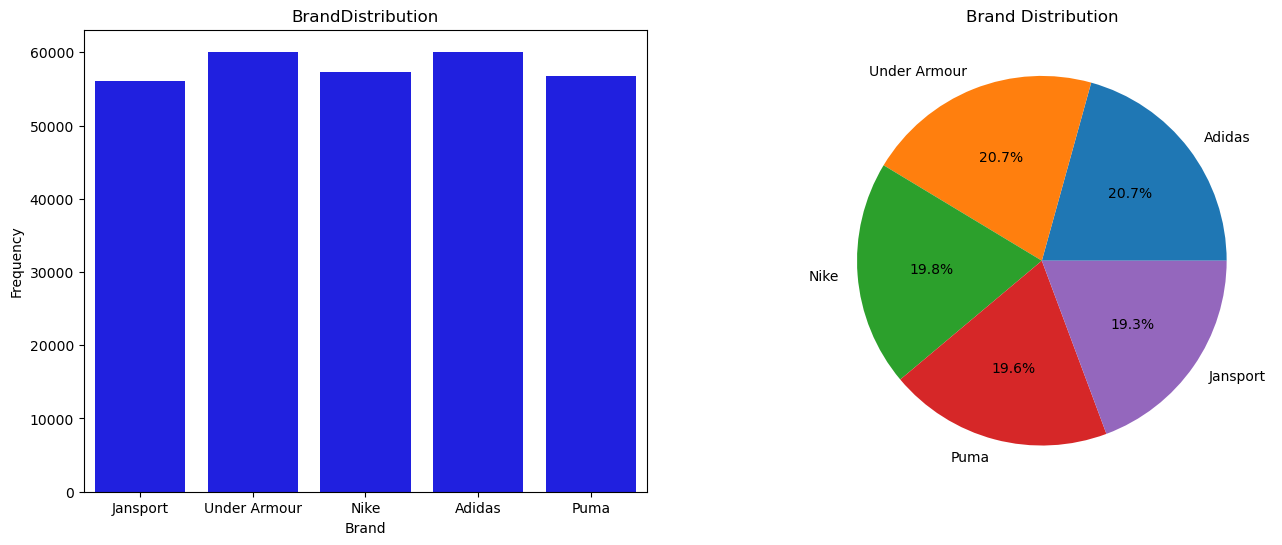

In [58]:
plot_categorical(df, 'Brand', 'blue')

Các thương hiệu phân bố khá đồng đều, cao nhất là Under Armour và Adidas với số lượng xấp xỉ 60.000 chiếm 20.7% và thấp nhất là Jansport với số lượng xấp xỉ 55.000 chiếm 19.3%

Material

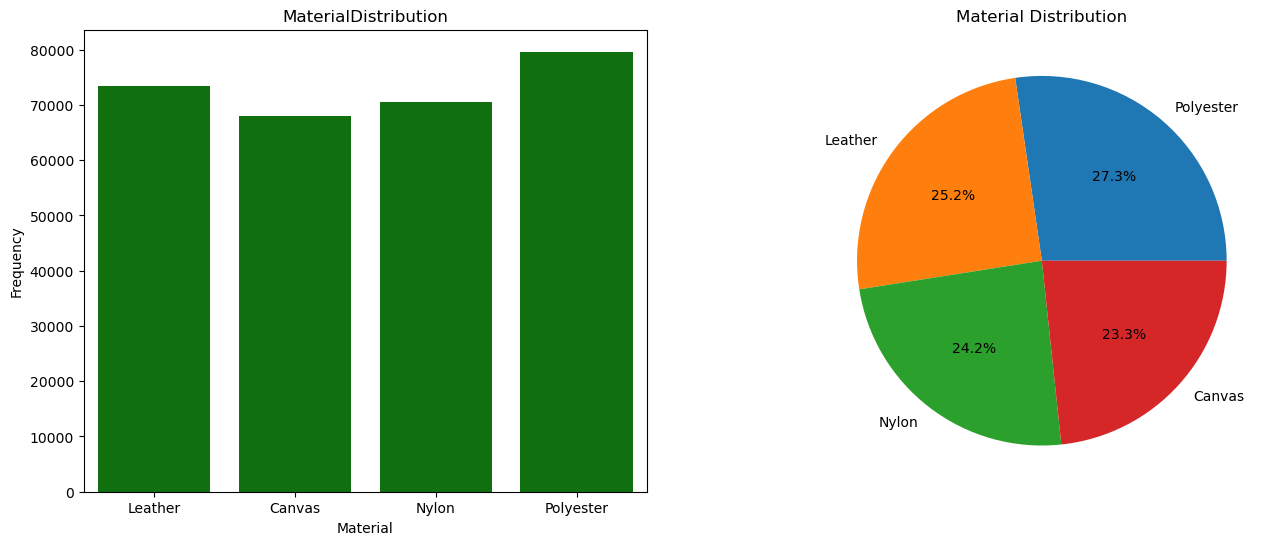

In [59]:
plot_categorical(df, 'Material', 'green')

Các chất liệu phân bố khá đồng đều, tuy nhiên số lượng Polyester chiếm ưu thế, loại này đang được chuộng vì khả năng chống thấp nước vượt trội của nó. Đi theo sau là chất liệu Leather (da) đứng thứ hai vì tính sang trọng của nó và loại này thường thuộc phân khúc tầm cao.

Size

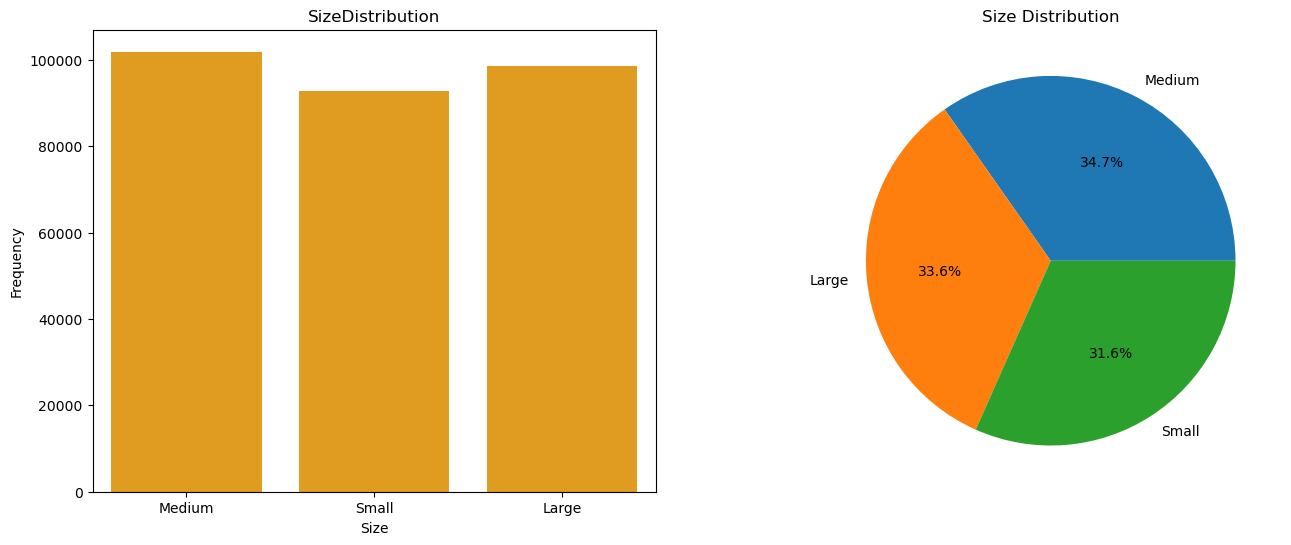

In [60]:
plot_categorical(df, 'Size', 'orange')

Những chiếc cặp có kích cỡ trung bình tiện sử dụng trong mọi trường hợp, chúng không quá nhỏ để đựng những vật thể có kích cỡ to và cũng không quá lớn để mang vác cồng kềnh.

Tâm lý khách hàng thường có xu hướng muốn mình vừa được này, vừa đủ kia, nên có xu hướng chọn những chiếc cặp có kích cỡ trung bình (34.7%) để không quá nhỏ so với cặp kích cỡ lớn và không quá lớn so với cặp kích cỡ nhỏ.

Laptop Compartment

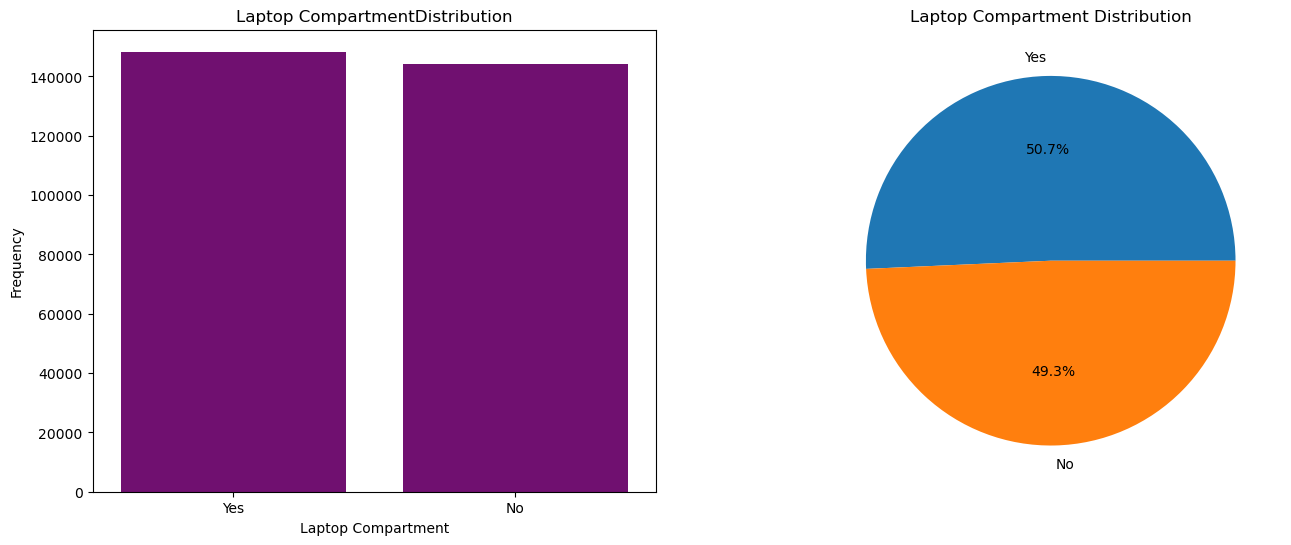

In [61]:
plot_categorical(df, 'Laptop Compartment', 'purple')

Trong thời đại công nghệ, con người ai cũng có trong mình một chiếc laptop. Việc mua một chiếc cặp có ngăn đựng laptop chắc chắn sẽ được ưu tiên hơn và tính theo số đông thì đương nhiên loại có ngăn laptop sẽ được ưa chuộng hơn.

Waterproof

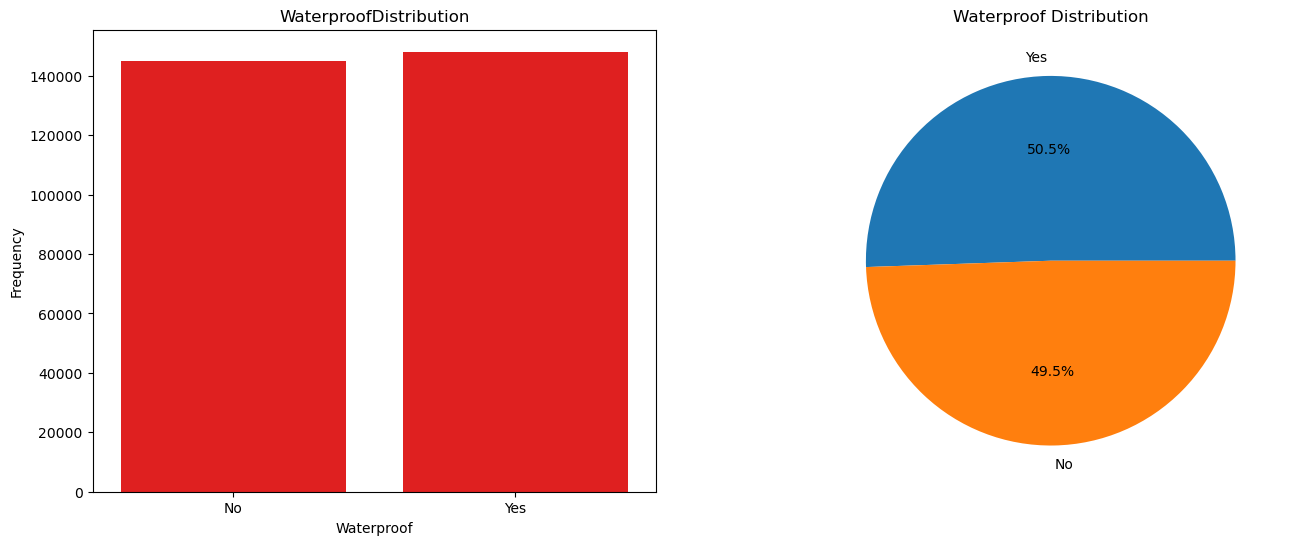

In [62]:
plot_categorical(df, 'Waterproof', 'red')

Những chiếc cặp có thấm nước được ưa chuộng hơn bởi vì tính bền bỉ của chúng, chúng ta có thể nâng thêm tiền một tí để mua được loại chống thấm nước thay vì mua loại bị thấm nước.

Style

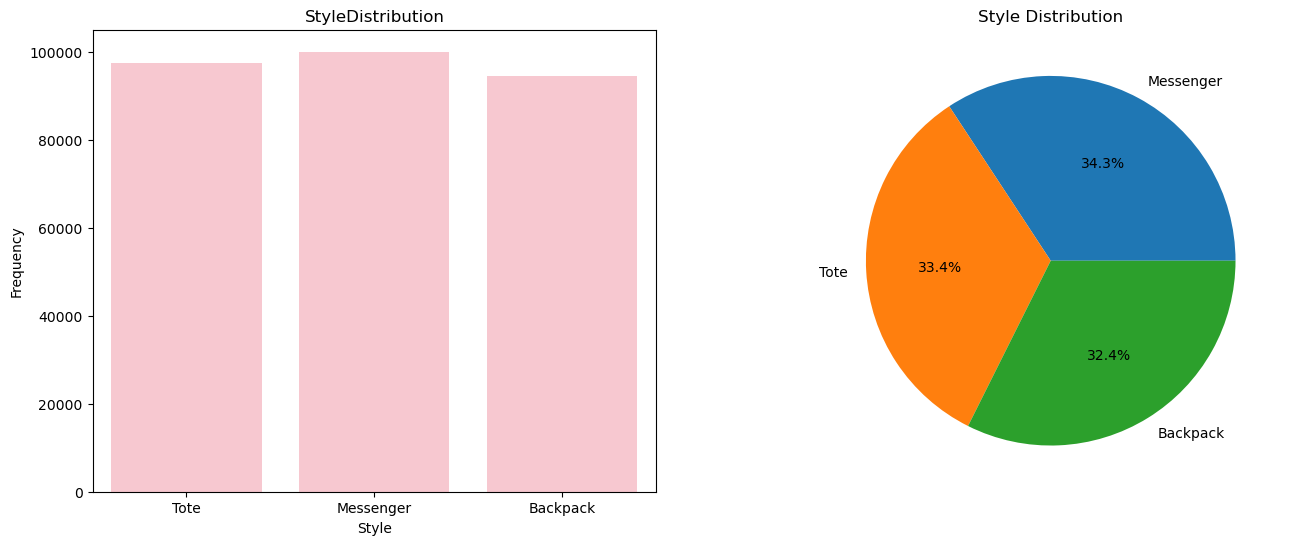

In [63]:
plot_categorical(df, 'Style', 'pink')

Mặc dù sự chênh lệch không quá lớn giữa các kiểu dáng, nhưng Messenger dẫn đầu vì nó phù hợp với mọi lứa tuổi từ già đến trẻ, đa số là người làm công sở và sinh viên, kiểu dáng hiện đại mang tính thời thượng và nhiều ngăn hơn kiểu tote

Color

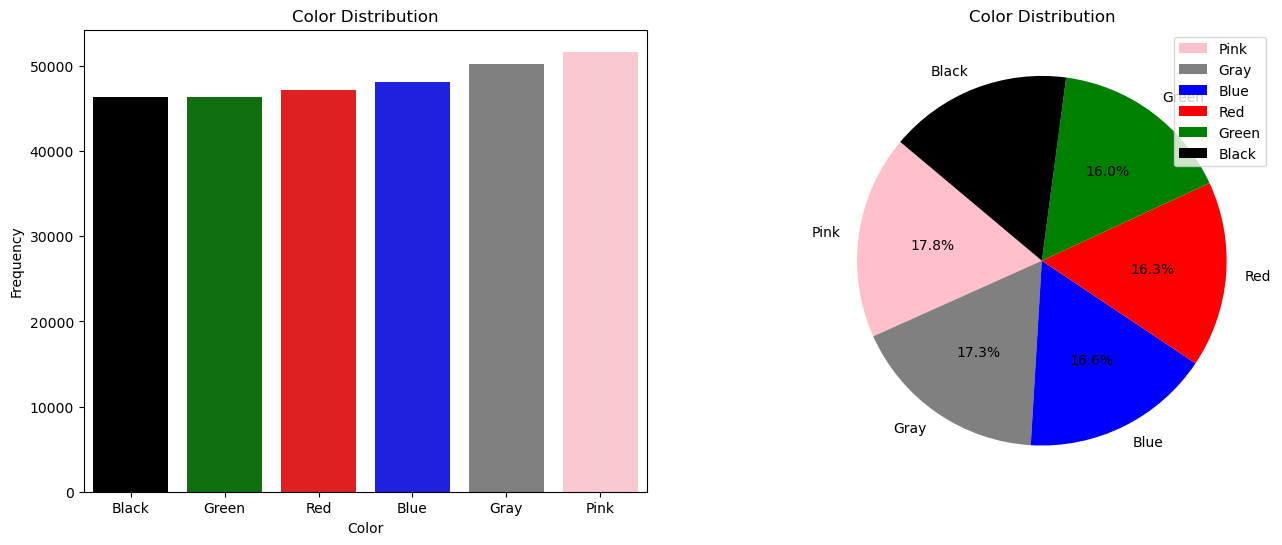

In [64]:
List_color = df['Color'].unique().tolist()

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.countplot(
    data=df,
    x="Color",
    palette=List_color,
)
plt.title('Color Distribution')
plt.xlabel('Color')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
color_counts = df["Color"].value_counts()
labels = color_counts.index
sizes = color_counts.values
colors = labels
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Color Distribution")
plt.legend()

plt.savefig(os.path.join(MODEL_DIR, "reports/eda/color.png"), dpi=300, bbox_inches='tight')
plt.show()

Phân bố các màu tương đối đồng đều, tuy có sự chênh lệch nhẹ:

 - Pink (17.8%) và Gray (17.3%) là hai màu phổ biến nhất.

 - Black, Green, Red, Blue dao động quanh ~16%.

Không có màu nào chiếm ưu thế vượt trội hay quá hiếm (mỗi màu chiếm từ 16%–17.8%).



### Biến định lượng

In [65]:
def plot_numerical(df, column, color, have_kde, bins='auto'):
  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  sns.histplot(data=df, x=df[column], kde=have_kde, bins=bins, color=color)
  plt.title(f'{column} Distribution')
  plt.xlabel(column)
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  sns.boxplot(data=df, x=df[column],  color=color)
  plt.title(f'{column} Distribution')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.savefig(os.path.join(MODEL_DIR, f"reports/eda/{column}.png"), dpi=300, bbox_inches='tight')
  plt.show()

Compartments

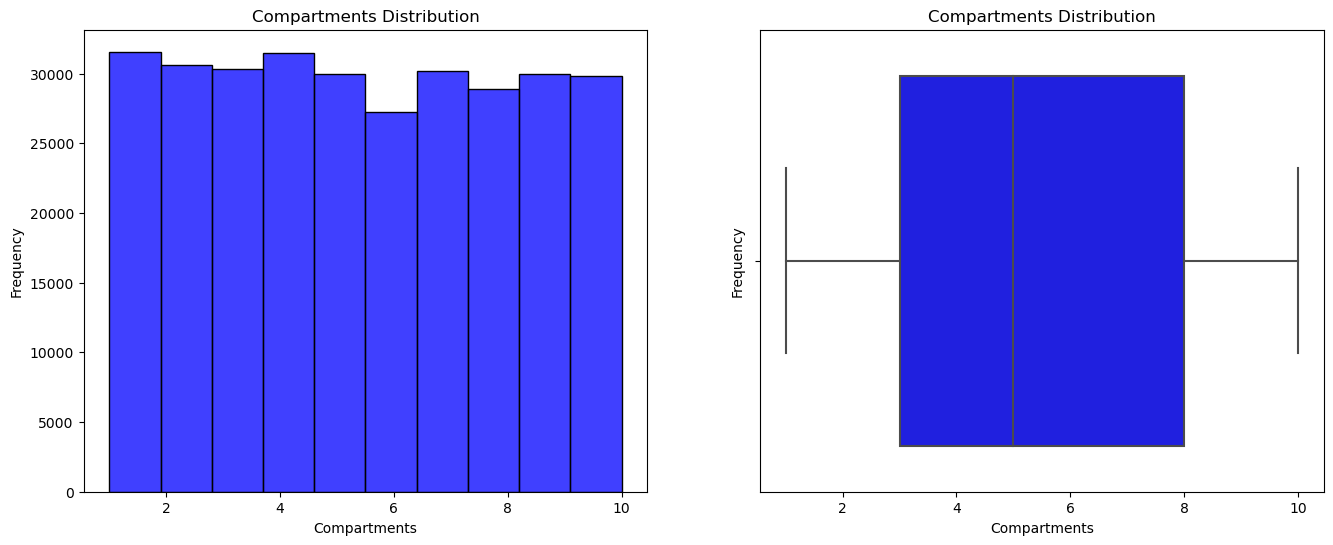

In [66]:
plot_numerical(df, 'Compartments', 'blue', False, 10)

Các giá trị gần như đồng đều, chỉ dao động nhẹ quanh mức 400.000 mẫu cho mỗi giá trị. Các thuộc tính của `Compartments` phân bố rất đồng đều, không có sự thiên lệch về số lượng ngăn

Phần lớn các cặp có số ngăn từ 1 đến 10 và trung vị khoảng 5 đến 6, các giá trị ở trong phạm vị bình thường và không có dữ liệu ngoại lệ.

Phân bố đều này là lý tưởng để mô hình học được ảnh hưởng của từng giá trị ngăn đối với giá cặp, không bị lệch do mất cân bằng dữ liệu.

Weight Capacity

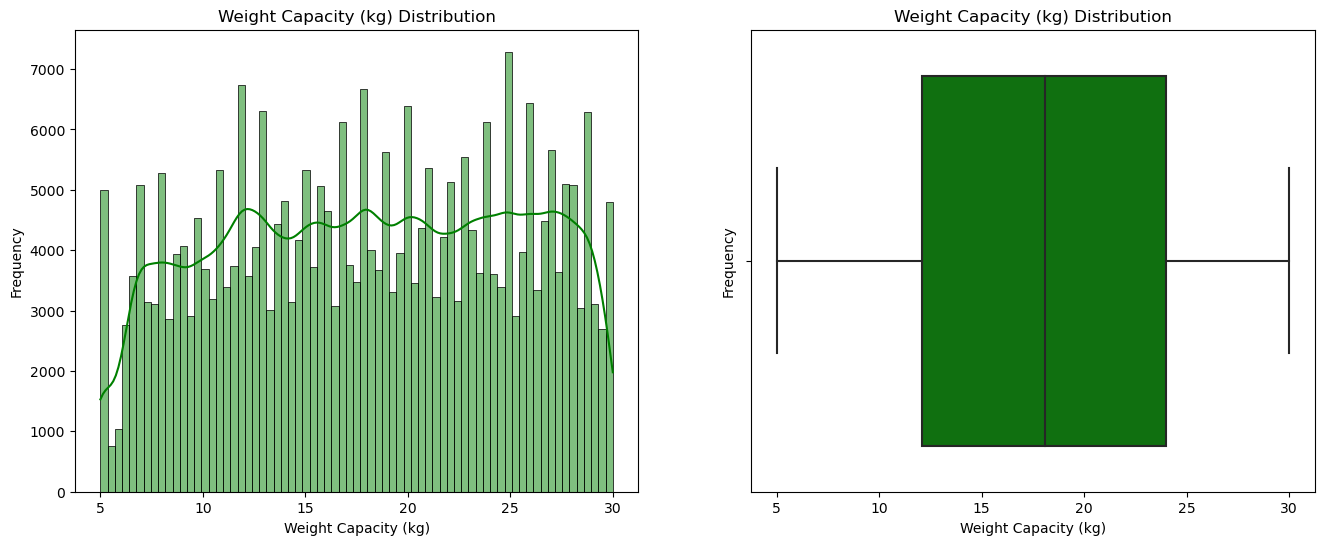

In [67]:
plot_numerical(df, 'Weight Capacity (kg)', 'green', True)

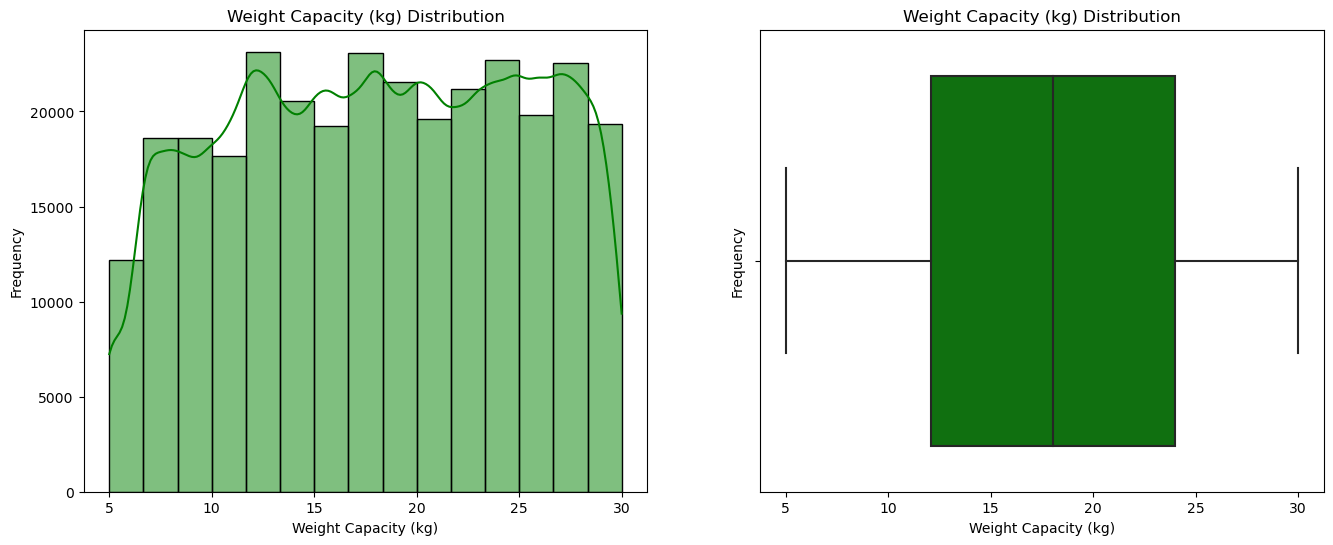

In [68]:
plot_numerical(df, 'Weight Capacity (kg)', 'green', True, 15)

Khối lượng của cặp phân bố khá đồng đều từ 5 đến 30kg. Số lượng 5kg chiếm đa số so với phần còn lại nhưng đồ thị vẫn đảm bảo cân bằng và phân bố đều dựa trên nhóm giá trị

Khối lượng trung bình rơi vào khoảng từ 12 tới 24kg và trung vị khoảng 18 đến 19kg, và không có điểm ngoại lệ

Đây là phân phối lý tưởng để mô hình học được ảnh hưởng của từng giá trị khối lượng đối với giá cặp, không bị lệch do mất cân bằng dữ liệu.

Price

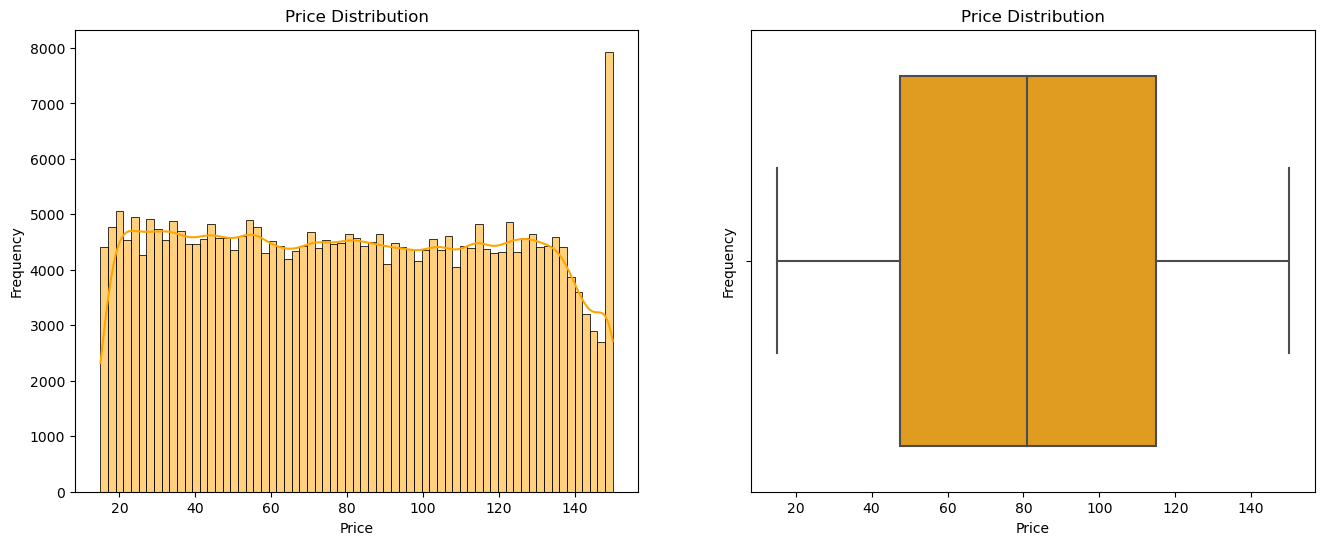

In [69]:
plot_numerical(df, 'Price', 'orange', True)

Giá trị của cặp phân bố khá đồng đều từ dưới 20 đến hơn 140 USD tuy nhiên ở mức 150USD có tần suất cao rõ rệt.

Trung bình các cặp có giá trị từ dưới 50 đến gần 120 USD và trung vị 80 USD, gần như không có điểm ngoại lệ nào.

Đây là phân phối lý tưởng để làm đầu ra cho mô hình học, không bị lệch do mất cân bằng dữ liệu.

## Phân tích hai biến

### Định lượng - Định lượng

Compartments - Price

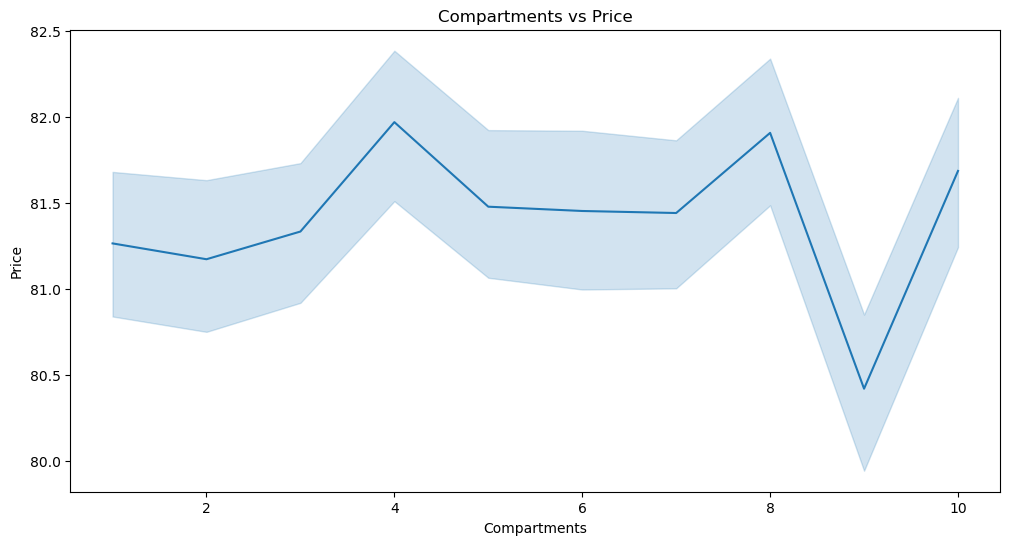

In [70]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Compartments', y='Price')
plt.title('Compartments vs Price')
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/com_price.png"), dpi=300, bbox_inches='tight')
plt.show()

Nhìn chung có xu hướng ổn định, tuy nhiên ở ngăn thứ 9 thì đột nhiên giá giảm mạnh, có vẻ như cặp 9 ngăn không được ưa chuộng chăng?

Giá tiền không có sự ảnh hưởng rõ ràng bởi số ngăn.

Weight Capacity - Price

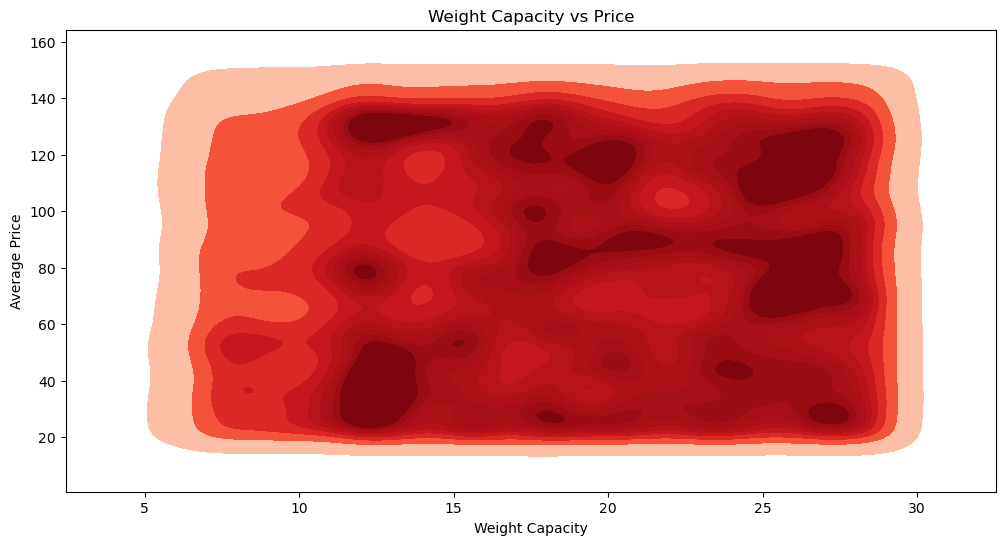

In [71]:
plt.figure(figsize=(12, 6))

sns.kdeplot(data=df, x='Weight Capacity (kg)', y='Price', fill=True, cmap='Reds')
plt.xlabel('Weight Capacity')
plt.ylabel('Average Price')
plt.title('Weight Capacity vs Price')
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/weight_price.png"), dpi=300, bbox_inches='tight')
plt.show()

Nhìn chung trọng lượng chứa của cặp không ảnh hưởng đến giá thành, mỗi trọng lượng chứ đều có giá trải dài 20 đến 140USD

Compartments - Weight Capacity

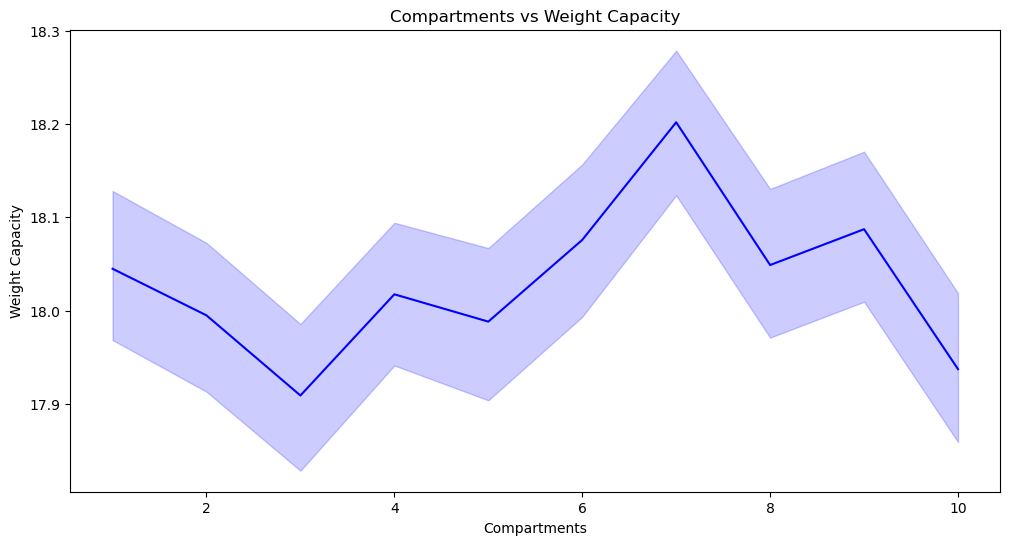

In [72]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df, x='Compartments', y='Weight Capacity (kg)', color='blue')
plt.xlabel('Compartments')
plt.ylabel('Weight Capacity')
plt.title('Compartments vs Weight Capacity')
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/com_weight.png"), dpi=300, bbox_inches='tight')
plt.show()

Số lượng ngăn không ảnh hưởng đáng kể đến trọng lượng chứa, với một vài ngoại lệ nhỏ có thể do thiết kế sản phẩm. Sự biến động là nhỏ và không cho thấy xu hướng tăng/giảm rõ ràng.

## Định lượng - Định tính

In [73]:
categorical = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
color = ['blue', 'green', 'orange', 'purple', 'red', 'pink', 'brown']

def plot_numeric_categorical(df, numeric, categorical, color, binrange=None, bins='auto'):
  plt.figure(figsize=(36, 74))

  for column in categorical:

    plt.subplot(7, 2, 2*categorical.index(column) + 1)
    sns.boxplot(data=df,
                x=column,
                y=numeric,
                color=color[categorical.index(column)])
    plt.title(f'{column} vs {numeric}')
    plt.xlabel(column)
    plt.ylabel(f'{numeric}')

    plt.subplot(7, 2, 2*categorical.index(column) + 2)
    sns.histplot(data=df,
                 x=numeric,
                 hue=column,
                 palette='Set1',
                 multiple='stack',
                 binwidth=1,
                 binrange=binrange,
                 bins=bins)
    plt.title(f'{column} vs {numeric}')
    plt.xlabel(column)
    plt.ylabel(f'{numeric}')
  plt.savefig(os.path.join(MODEL_DIR, f"reports/eda/{column}_cal.png"), dpi=300, bbox_inches='tight')
  plt.show()

Compartments

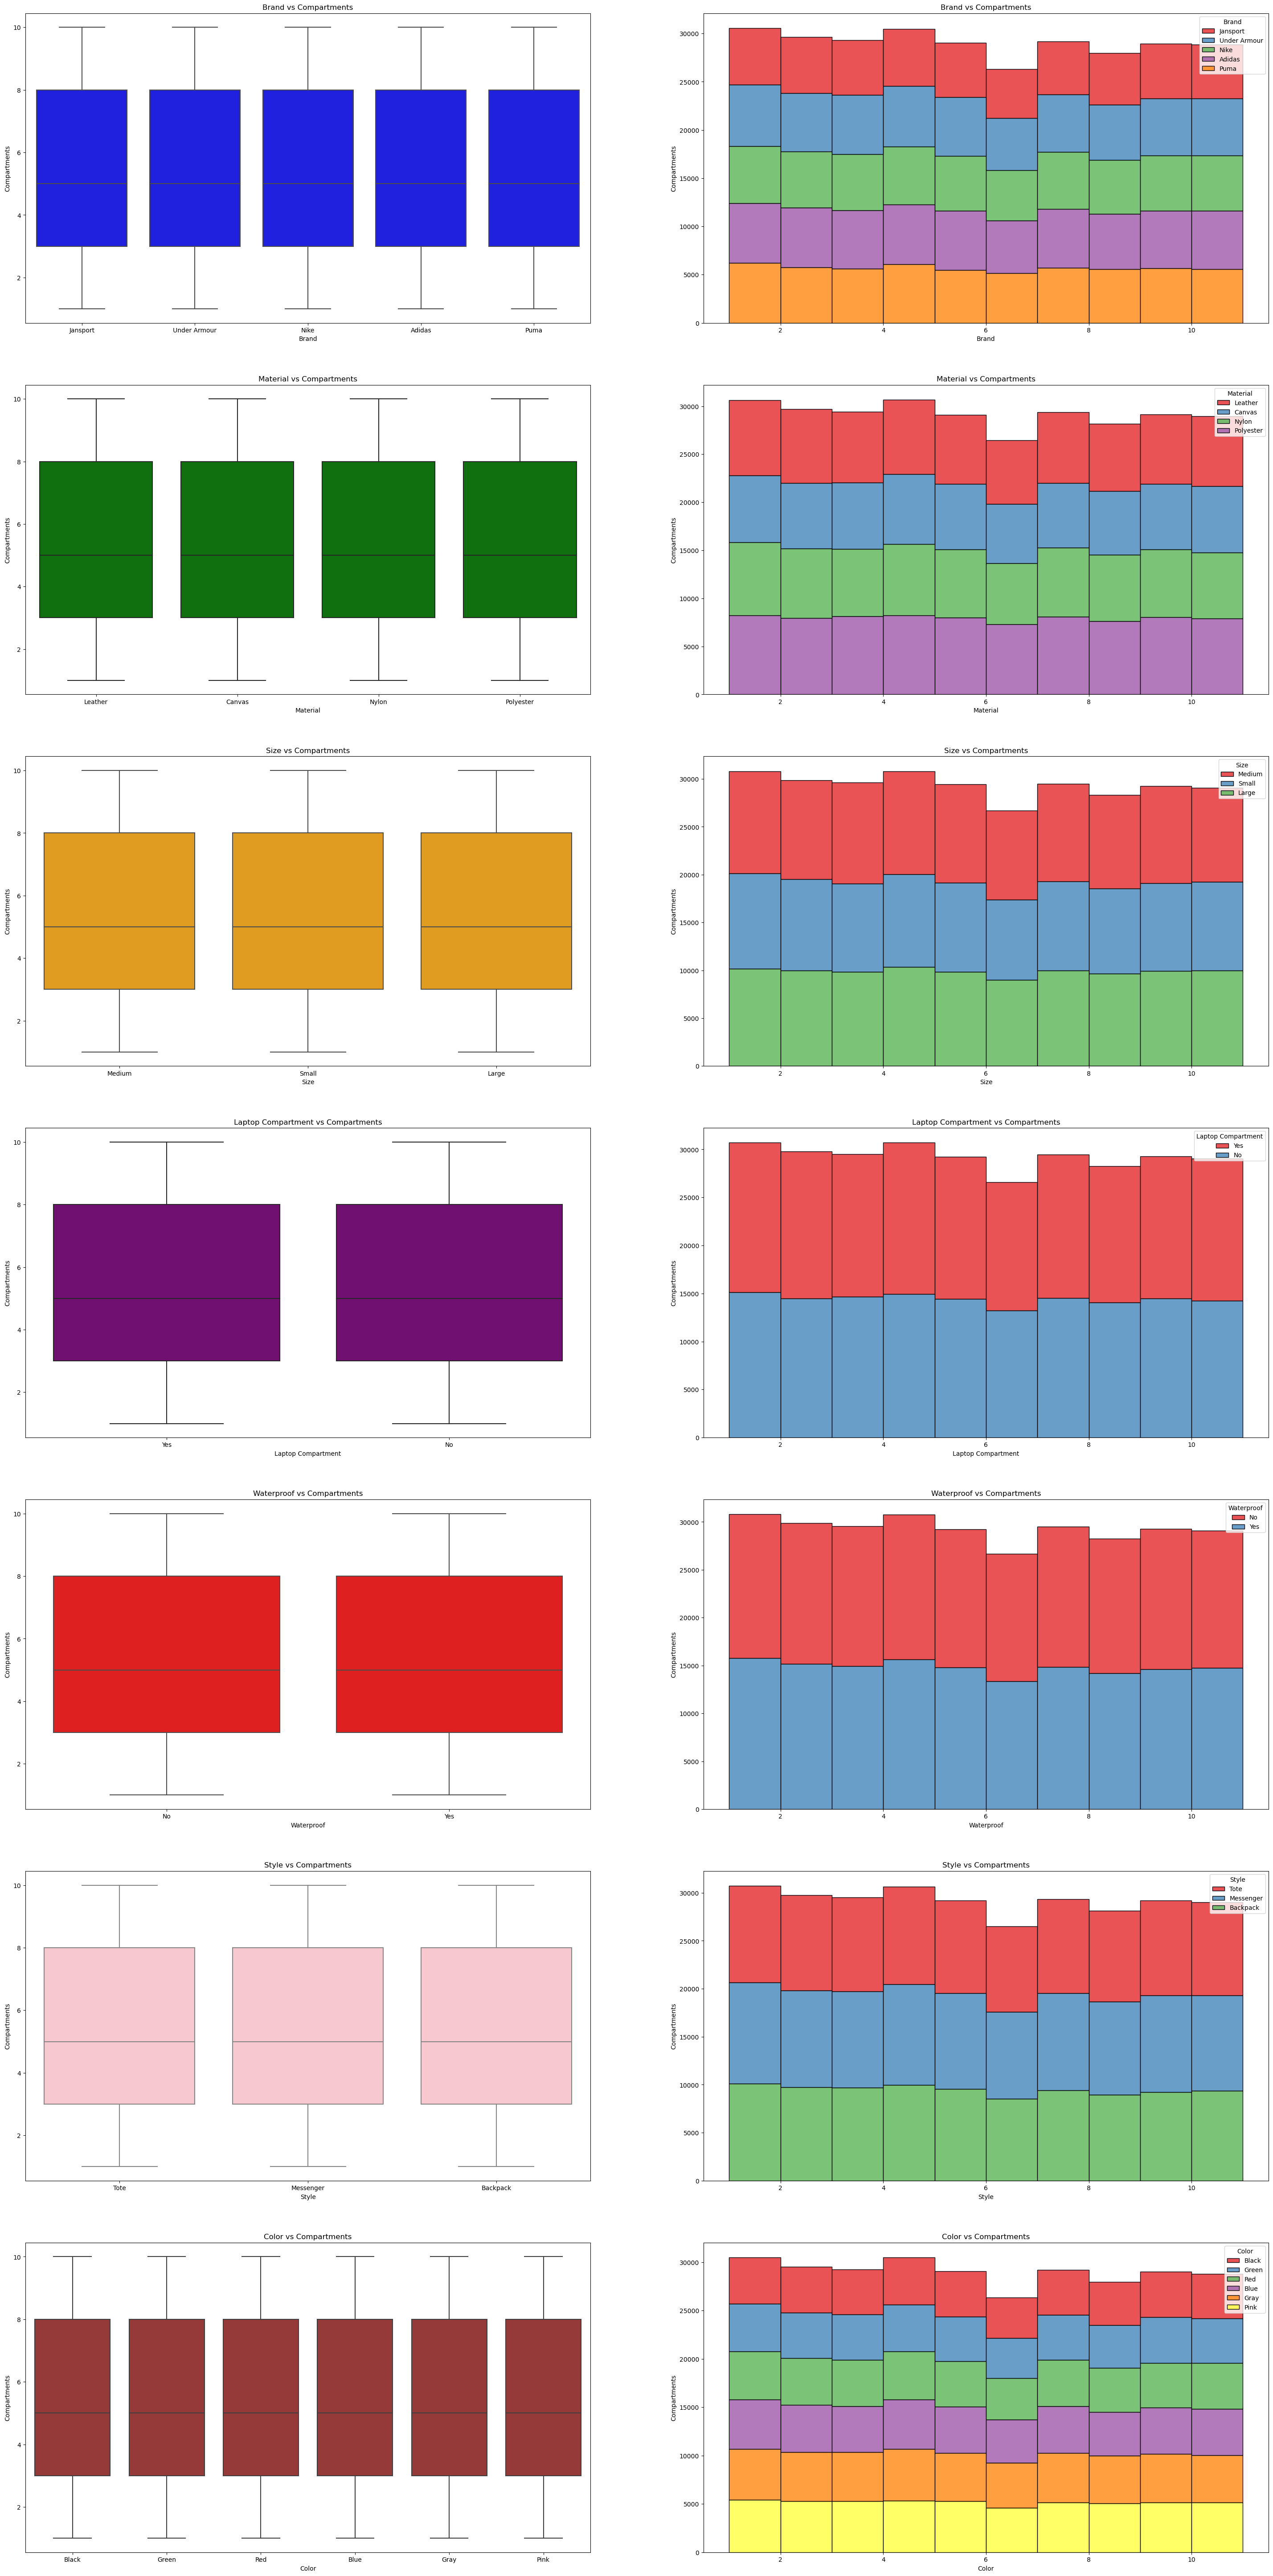

In [74]:
plot_numeric_categorical(df, 'Compartments', categorical, color, binrange=(1, 11))

1. Brand vs Compartments:

  - Các thương hiệu như Nike và Under Armour có số ngăn trung bình hơi cao hơn so với Adidas và Puma.
  - Tuy nhiên, độ chênh lệch giữa các thương hiệu không quá lớn — phân bố khá đồng đều.
  - Không có ảnh hưởng rõ ràng giữa hai đặc trưng.

2. Material vs Compatments:

  - Leather và Polyester có số ngăn trung bình nhỉnh hơn một tí so với Canvas và Nylon.
  - Phân phối số ngăn giữa các loại vật liệu tương đối giống nhau.
  - Không có ảnh hưởng rõ ràng giữa hai đặc trưng.

3. Size vs Compatments:

  - Kích thước lớn hơn thì số ngăn nhiều hơn.
  - Điều nãy cũng khá dễ hiểu, kích cỡ lớn hơn thì nhu cầu chia loại đồ dùng cũng sẽ nhiều hơn nên nhà sản xuất có xu hướng chia thành nhiều ngăn nhỏ cho những chiếc cặp có kích thước lớn.

4. Laptop Compartment vs Compartments:

  - Cặp có nhiều ngăn hơn sẽ có số lượng có ngăn laptop nhỉnh hơn một tí.
  - Chưa có sự ảnh hưởng rõ ràng giữa hai đặc trưng.

5. Wateroof vs Compartments:

 - Không có sự chêch lệch giữa các ngăn.
 - Không nhận thấy sự ảnh hưởng giữa hai đặc trưng.

6. Style vs Compartments:

 - Lọai backpack chiếm đa số trong các ngăn.
 - Không có sự chệch lệch tỉ trọng đáng kể giữa các ngăn.
 - Không thấy sự ảnh hưởng giữa hai đặc trưng.

7. Color vs Compartments:

 - Không nhận thấy sự ảnh hưởng.

Kết luận:
 - Các đặc điểm Material (Polyester), Size (Large), Laptop Compartment (Yes), và Style (Backpack) có xu hướng đi kèm với số lượng ngăn nhiều hơn.

 - Các đặc điểm như Brand, Waterproof, Color ít ảnh hưởng rõ rệt đến số ngăn.

Weight Capacity

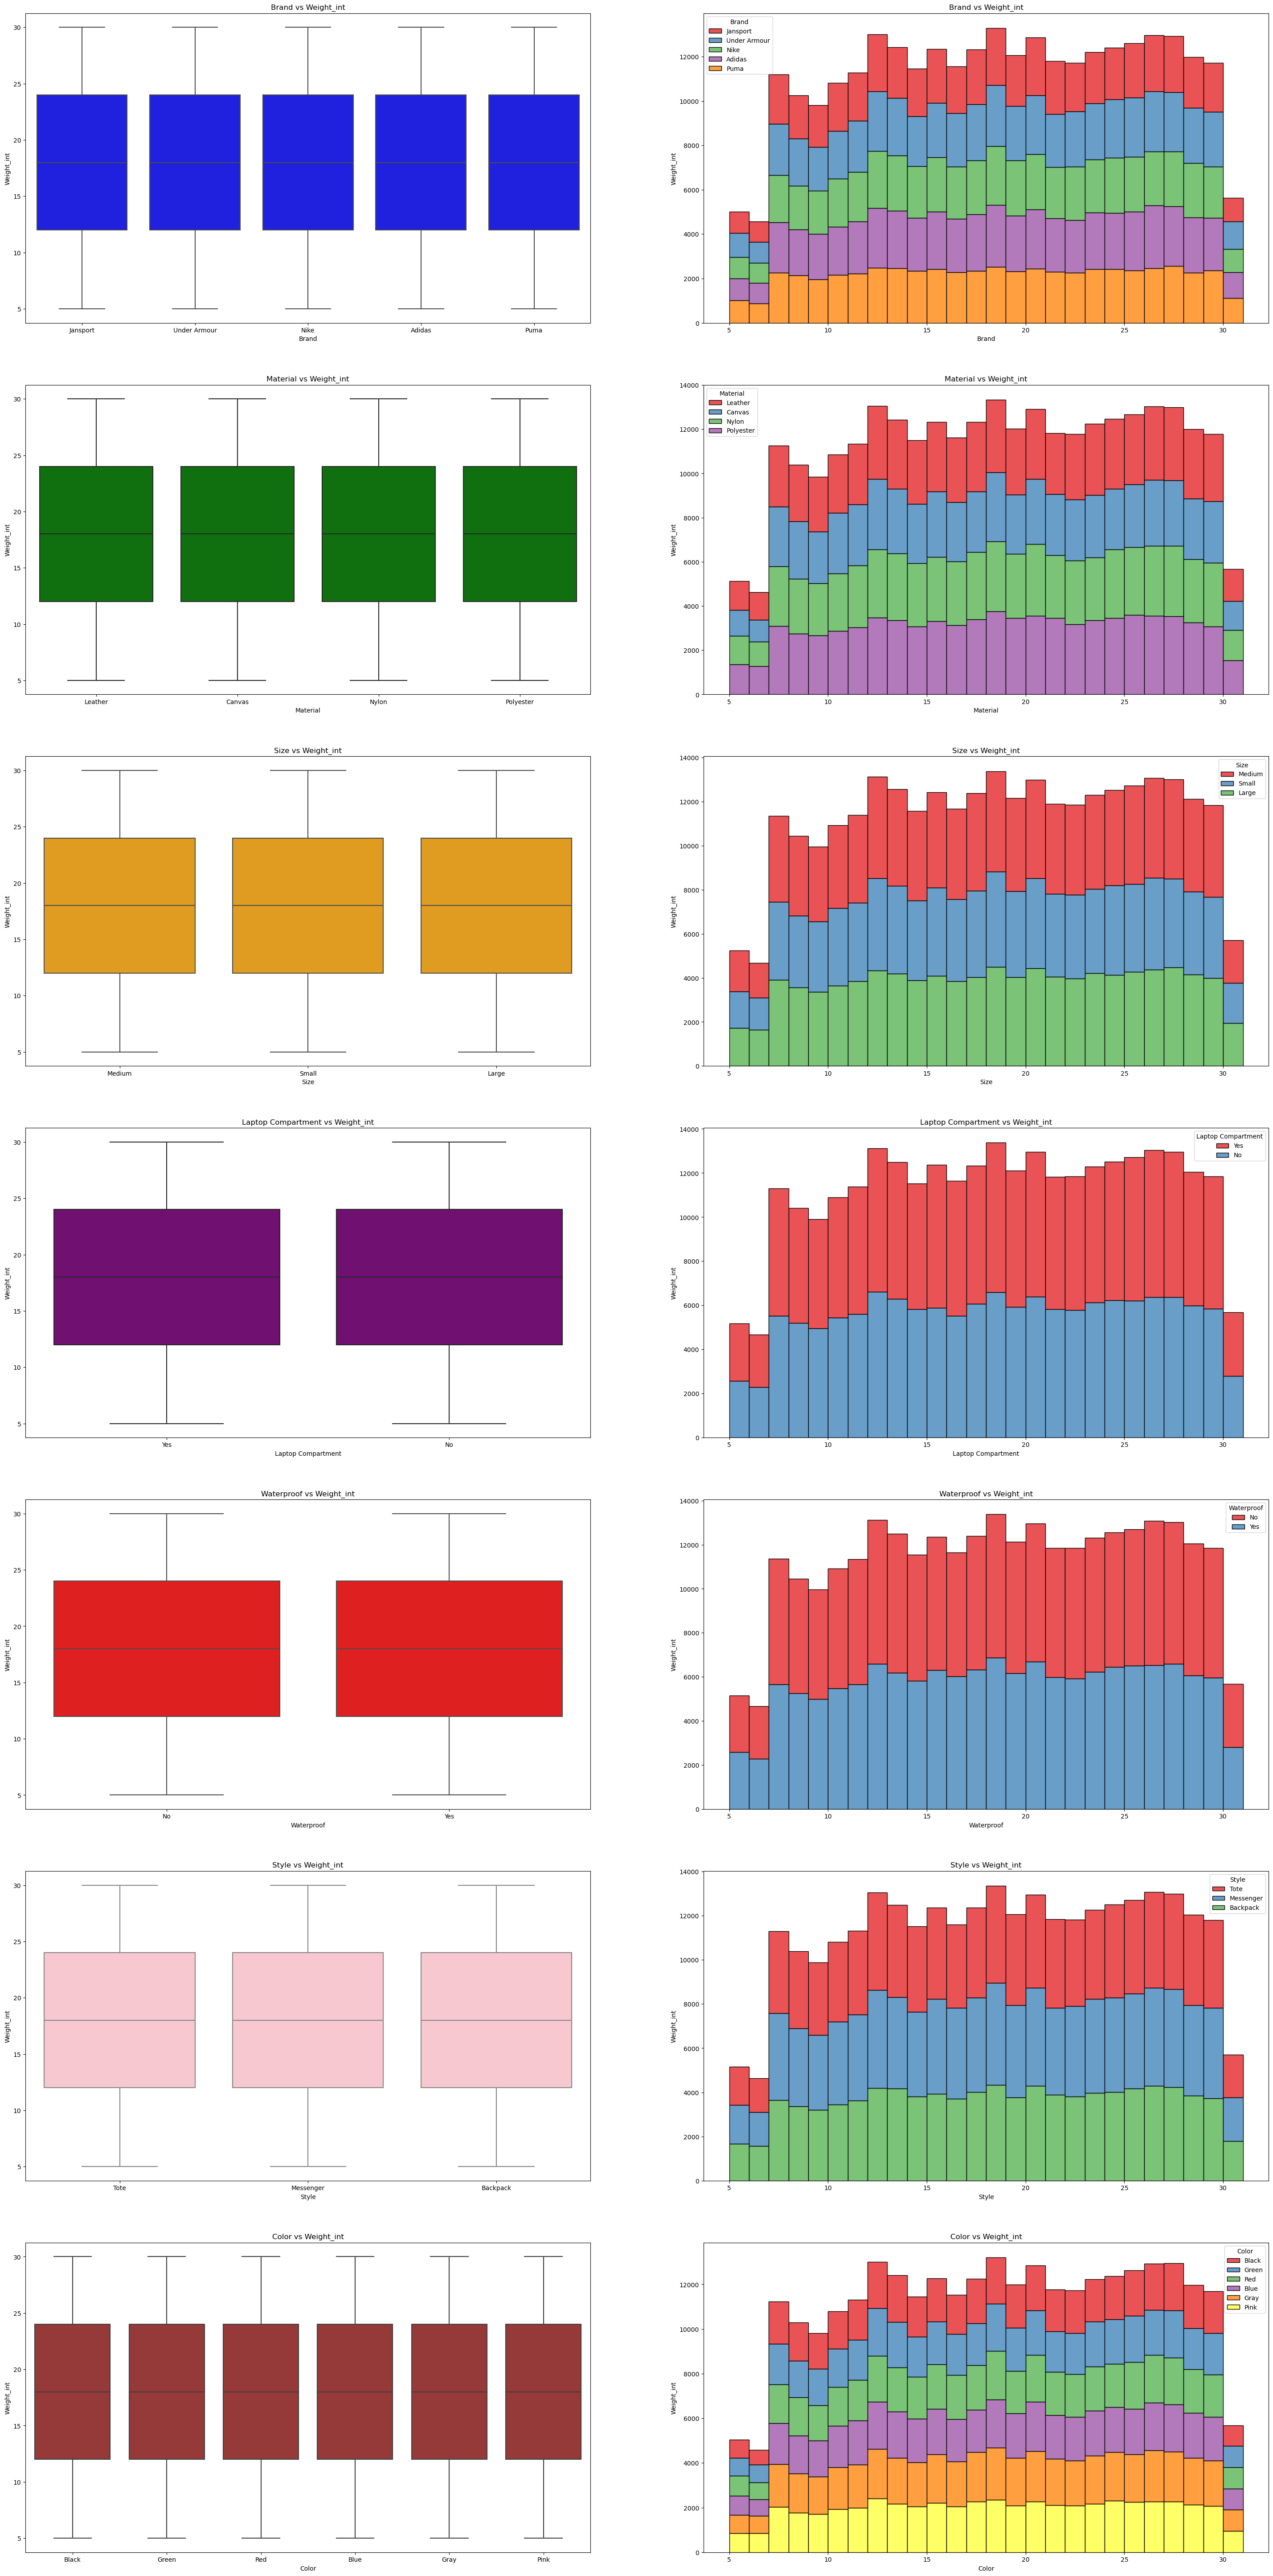

In [75]:
df['Weight_int'] = df['Weight Capacity (kg)'].round()
plot_numeric_categorical(df, 'Weight_int', categorical, color, binrange=(5,31))
df.drop('Weight_int', axis=1, inplace=True)

1. Brand vs Weight
 - Không có sự khác biệt rõ ràng giữa các thương hiệu về tải trọng cặp. tải trọng trung bình tương đương nhau.

 - Các thương hiệu được phân bố tương đối đồng đều theo từng mức tải trọng. Không có thương hiệu nào nổi bật ở các tải trọng cao/thấp.

2. Material vs Weight
 - Vật liệu Leather có xu hướng chịu tải trọng lớn hơn các loại khác (trung vị và tứ phân vị cao hơn). Polyester và Nylon chịu nhẹ hơn.

 - Leather thường chiếm tỷ lệ cao hơn ở mức tải trọng lớn, xác nhận xu hướng từ boxplot.

3. Size vs Weight
 - Cặp Large có tải trọng trung bình cao hơn rõ rệt so với Medium và Small.

 - Các cặp có tải trọng lớn (trên 20 kg) chủ yếu là size Large, còn size Small chủ yếu dưới 15 kg.

4. Laptop Compartment vs Weight
 - Cặp có ngăn laptop thường có tải trọng hơn so với cặp không có ngăn laptop.

 - Những cặp có tải trọng hơn 20 kg chủ yếu là loại có ngăn laptop.

5. Waterproof vs Weight
 - Không có sự khác biệt rõ ràng về tải trọng giữa cặp chống nước và không chống nước.

 - Phân phối khá đồng đều giữa hai nhóm.

6. Style vs Weight
 - Cặp kiểu Backpack có xu hướng có tải trọng hơn so với Tote và Messenger.

 - Các cặp có tải trọng hơn 20 kg chủ yếu là kiểu Backpack.

7. Color vs Weight
 - Không có mối liên hệ rõ ràng giữa màu sắc và tải trọng.

 - Các màu phổ biến như Black và Blue có mặt ở mọi mức tải trọng.

Nhìn chung, tải trọng cặp có thể đựng phụ thuộc rõ ràng vào các yếu tố như kích thước (Size), chất liệu (Material), kiểu dáng (Style) và sự có mặt của ngăn laptop. Các yếu tố như thương hiệu, khả năng chống nước và màu sắc không ảnh hưởng nhiều đến tải trọng.

Price

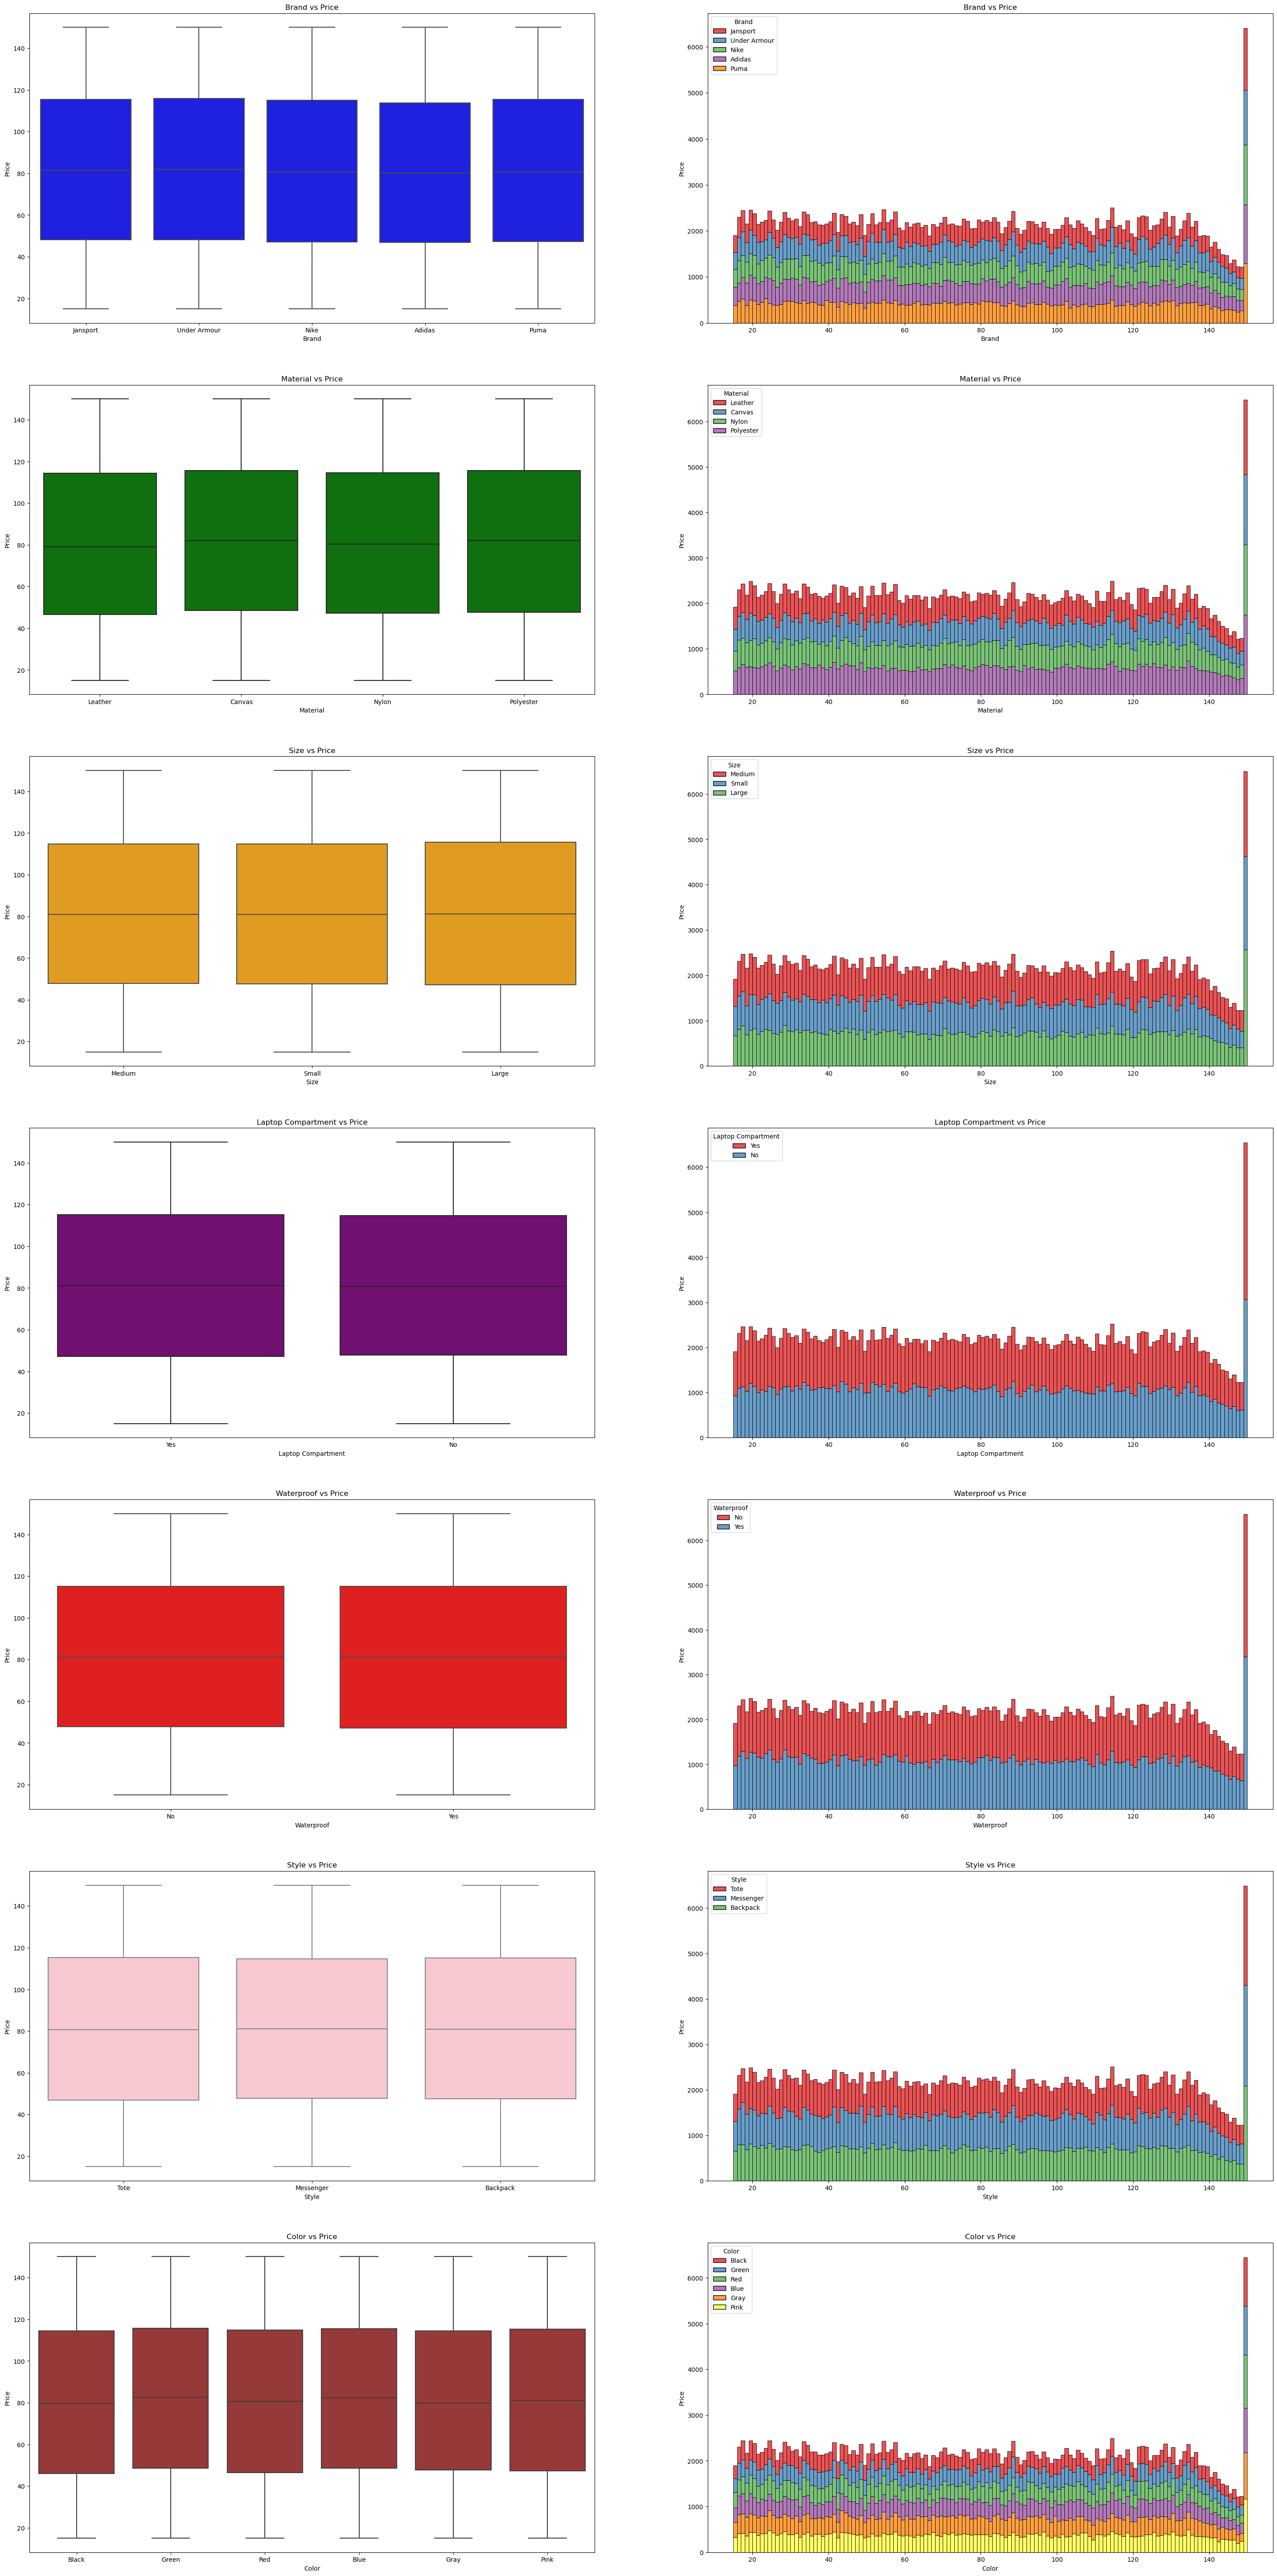

In [76]:
plot_numeric_categorical(df, 'Price', categorical, color)

1. Brand vs Price
 - Giá trung bình giữa các thương hiệu khá tương đồng. Tuy nhiên, có một vài giá trị ngoại lệ rất cao.

 - Giá tập trung chủ yếu dưới 200 USD, có một số sản phẩm có giá rất cao (trên 500 USD) nằm ở phần đuôi phân phối.

 - Không có thương hiệu nào vượt trội rõ rệt về giá. Các thương hiệu có dải giá khá giống nhau.

2. Material vs Price
 - Balo làm từ Leather có giá trung bình và giá trị cao nhất lớn hơn các chất liệu khác.
 - Tuy khác biệt về số lượng ở hai đầu phân khúc nhưng các loại chất liệu có tỉ lệ phân bố ở từng mức giá rất đồng đều.

 - Chất liệu không ảnh hưởng nhiều đến giá cả.

3. Size vs Price
 - Large có giá trung bình cao hơn Medium và Small, nhưng sự khác biệt không lớn.

 - Không có sự khác biệt quá rõ ràng trong phân phối giá giữa các size.

 - Kích thước có ảnh hưởng nhẹ đến giá.

4. Laptop Compartment vs Price

 - Phân bố giá gần như tương đương giữa hai nhóm.

 - Ngăn laptop ảnh hưởng nhẹ đến giá.

5. Waterproof vs Price
 - Không có khác biệt đáng kể.

 - Tính năng chống nước không ảnh hưởng rõ đến giá.

6. Style vs Price
 - Backpack có giá trung bình cao hơn Tote và Messenger.

 - Backpack chiếm nhiều ở khoảng giá cao.

 - Kiểu dáng ảnh hưởng đến giá. Backpack thường đắt hơn.

7. Color vs Price
  - Không có màu nào thể hiện ảnh hưởng rõ rệt đến giá.

  - Màu sắc không ảnh hưởng đến giá.

Material, Size, Laptop Compartment, và Style có khả năng ảnh hưởng đến giá. Brand, Waterproof, Color không đóng vai trò quan trọng trong biến đổi giá.

## Định tính - Định tính

In [77]:
categorical = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
def plot_categorical_categorical(df, categorical_column, categorical_column_others):
  plt.figure(figsize=(36, 36))
  for column in categorical_column_others:
    plt.subplot(3,2, categorical_column_others.index(column) + 1)
    sns.countplot(data=df, x=categorical_column, hue=column, palette='Set1')
    plt.title(f'{categorical_column} vs {column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Frequency')
  plt.savefig(os.path.join(MODEL_DIR, f"reports/eda/{column}_cal.png"), dpi=300, bbox_inches='tight')
  plt.show()

Brand

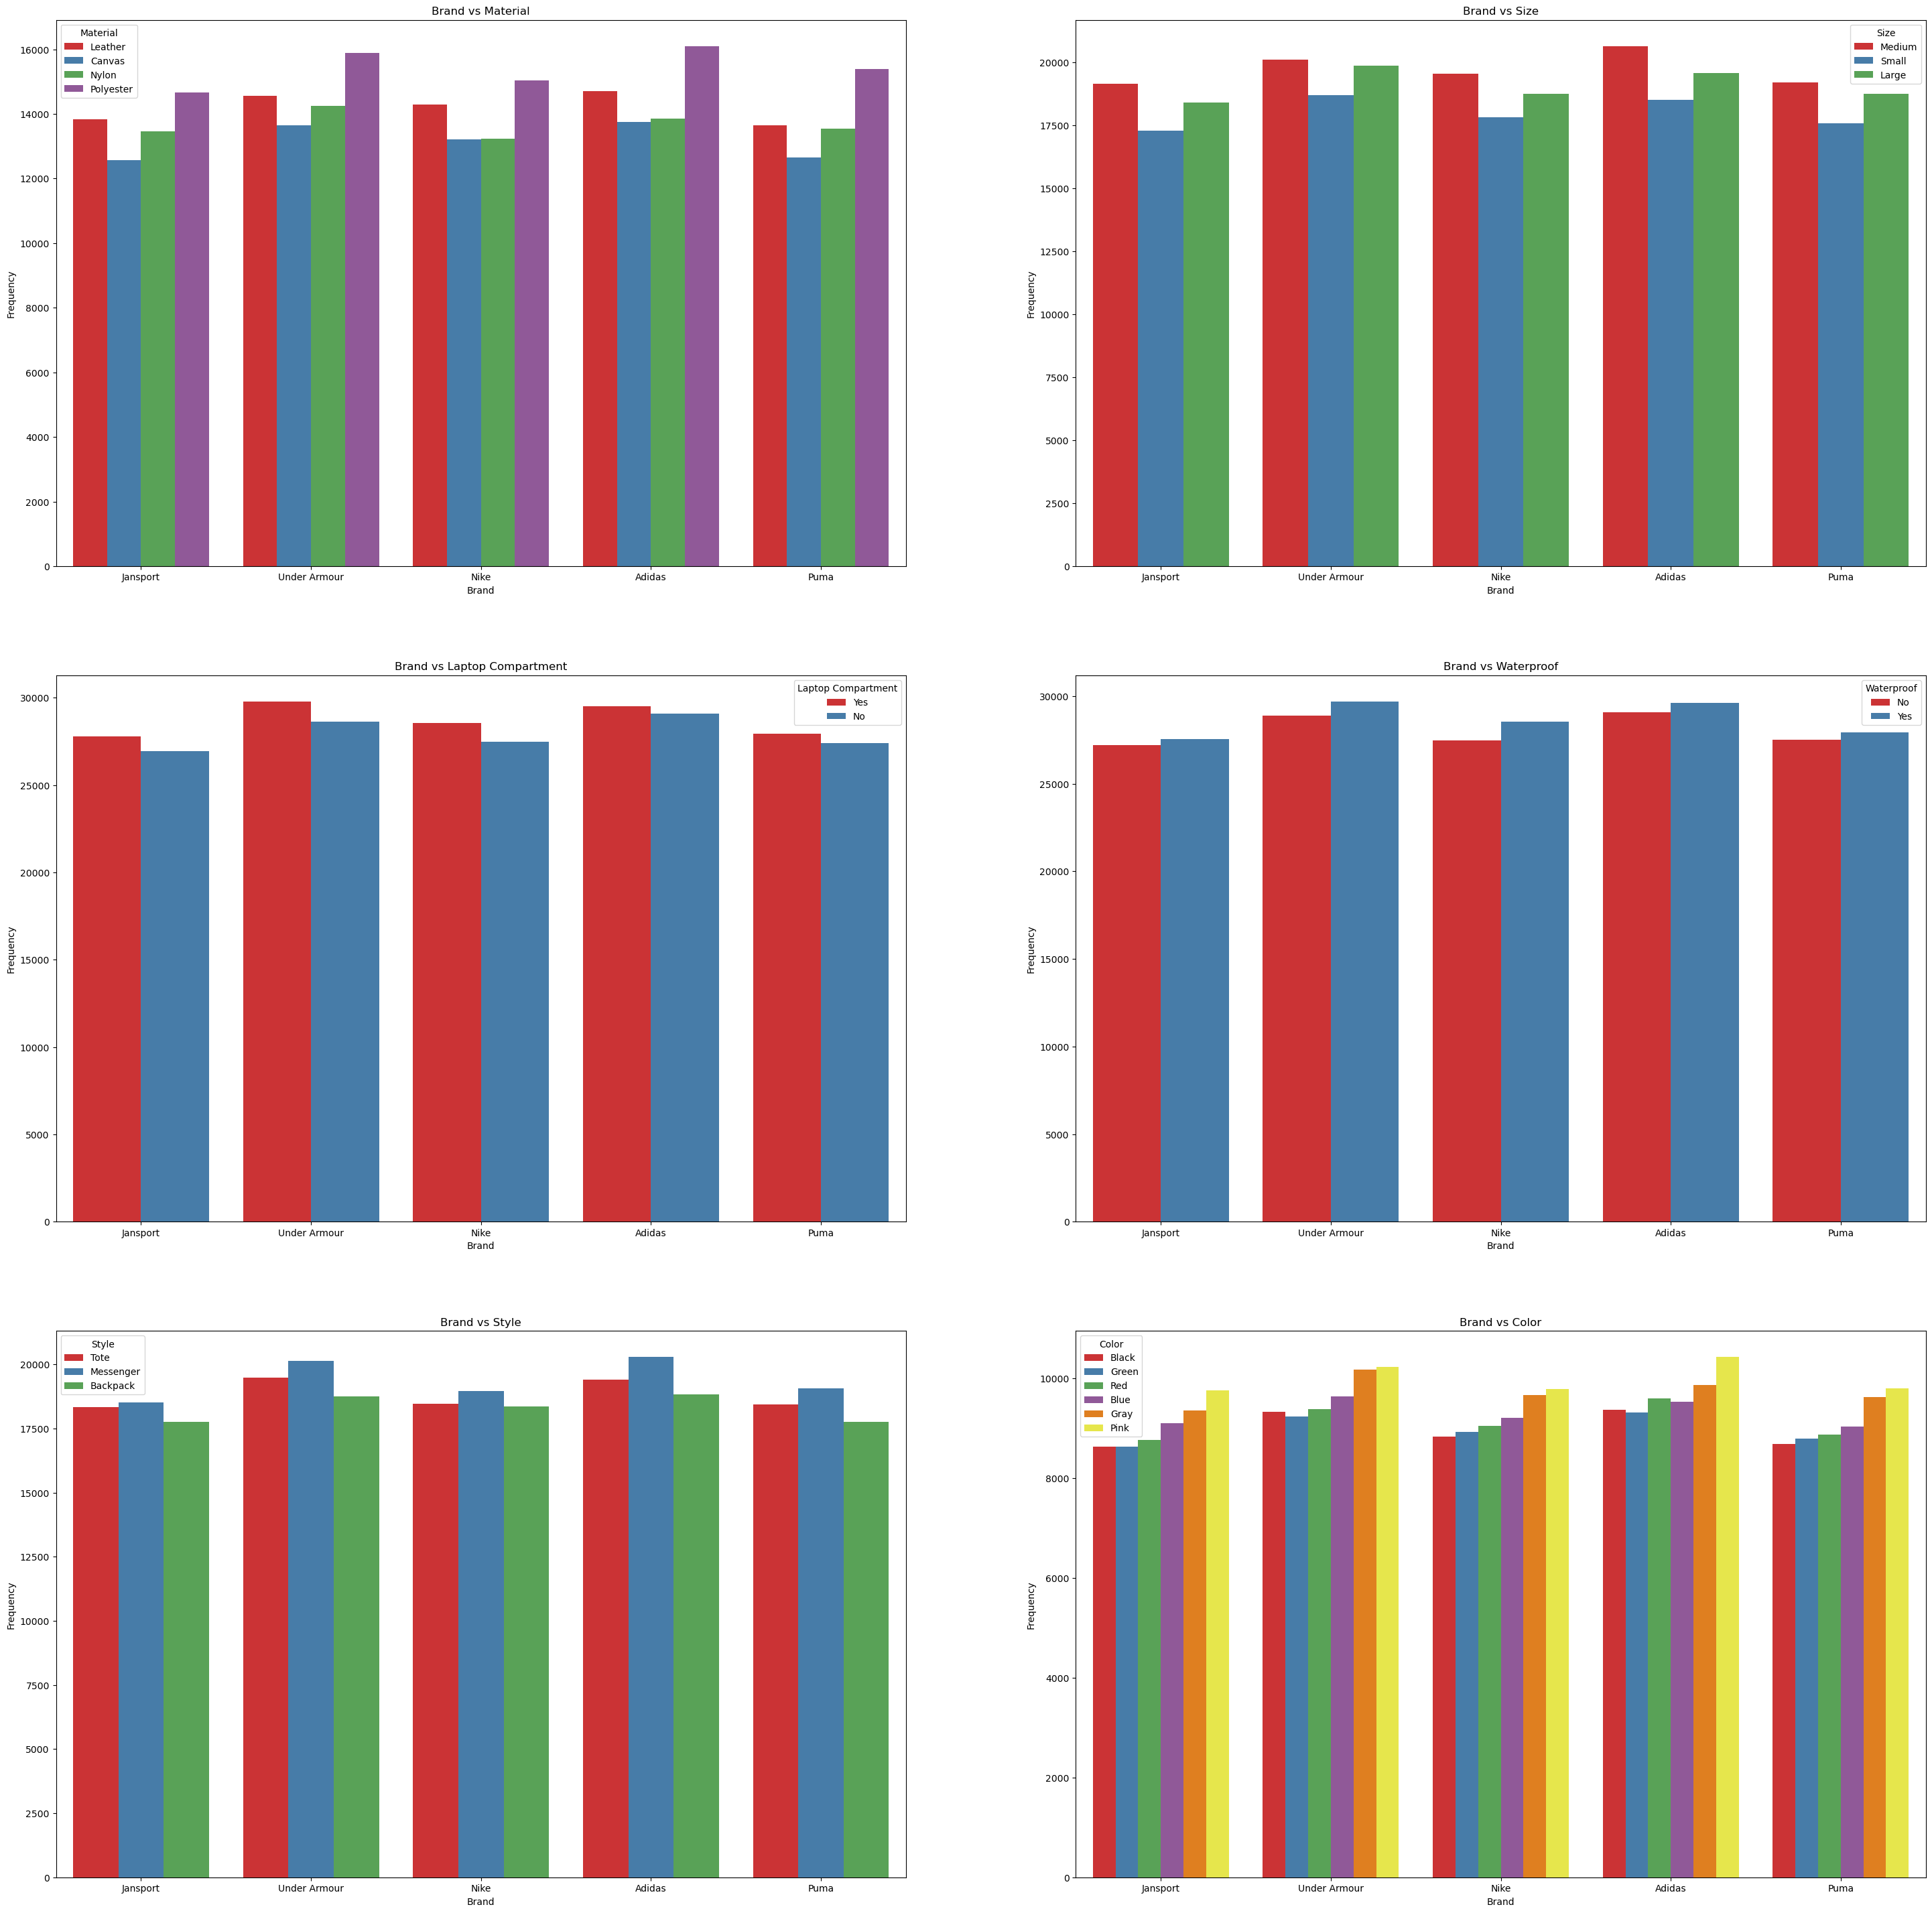

In [89]:
categorical_drop_brand = categorical.copy()
categorical_drop_brand.remove('Brand')
plot_categorical_categorical(df, 'Brand', categorical_drop_brand)

1. Brand vs Material
 - Tỉ lệ phân bố các thương hiệu gần như tương tự nhau giữa các chất liệu cặp. Tuy nhiên có sự biến động nho nhỏ giữa Nike và Adidas nhưng không đáng kể.
 - Brand có ảnh hưởng nhẹ đến Material.
2. Brand vs Size
 - Số lượng Medium luôn dẫn đầu với mọi thương hiệu, tuy nhiên với Puma và Under Amour thì tỉ lệ Large nhỉnh hơn tí nhưng vẫn thua Medium
 - Không có ảnh hưởng đáng kể giữa Brand và Size.
3. Brand vs Laptop Compartment
 - Tất cả thương hiệu đều sản xuất số lượng cặp có ngăn đựng laptop nhiều hơn cặp không có ngăn đựng laptop.
 - Tỉ lệ hai loại cặp này ở Adidas và Puma gần bằng nhau.
 - Không có ảnh hưởng đáng kể giữa Brand và Laptop Compartment.
4. Brand vs Waterproof
 - Tất cả thương hiệu đều sản xuất số lượng cặp thấp nước nhiều hơn cặp không thấm nước.
 - Tỉ lệ hai loại cặp này ở Jansport và Puma gần bằng nhau.
 - Không có ảnh hưởng đáng kể giữa Brand và Waterproof.
5. Brand vs Style
 - Các thương hiệu ưu tiên sản xuất loại cặp Mesenger.
 - Ở Jansport thì số lượng cặp loại Messenger có vẻ đuối hơn và gần bằng Tote.
 - Brand có ảnh hưởng nhẹ đến Style.
6. Brand vs Color
 - Màu hồng là màu được ưa chuộng bởi tất cả các thương hiệu, tuy nhiên ở Under Amour thì màu này và màu nâu xấp xỉ nhau.
 - Adidas sản xuất cặp có số lượng màu hồng lớn nhất
 - Brand có ảnh hưởng nhẹ đến Color.

Brand có sự ảnh hưởng nhẹ đến Material, Style và Color

Material

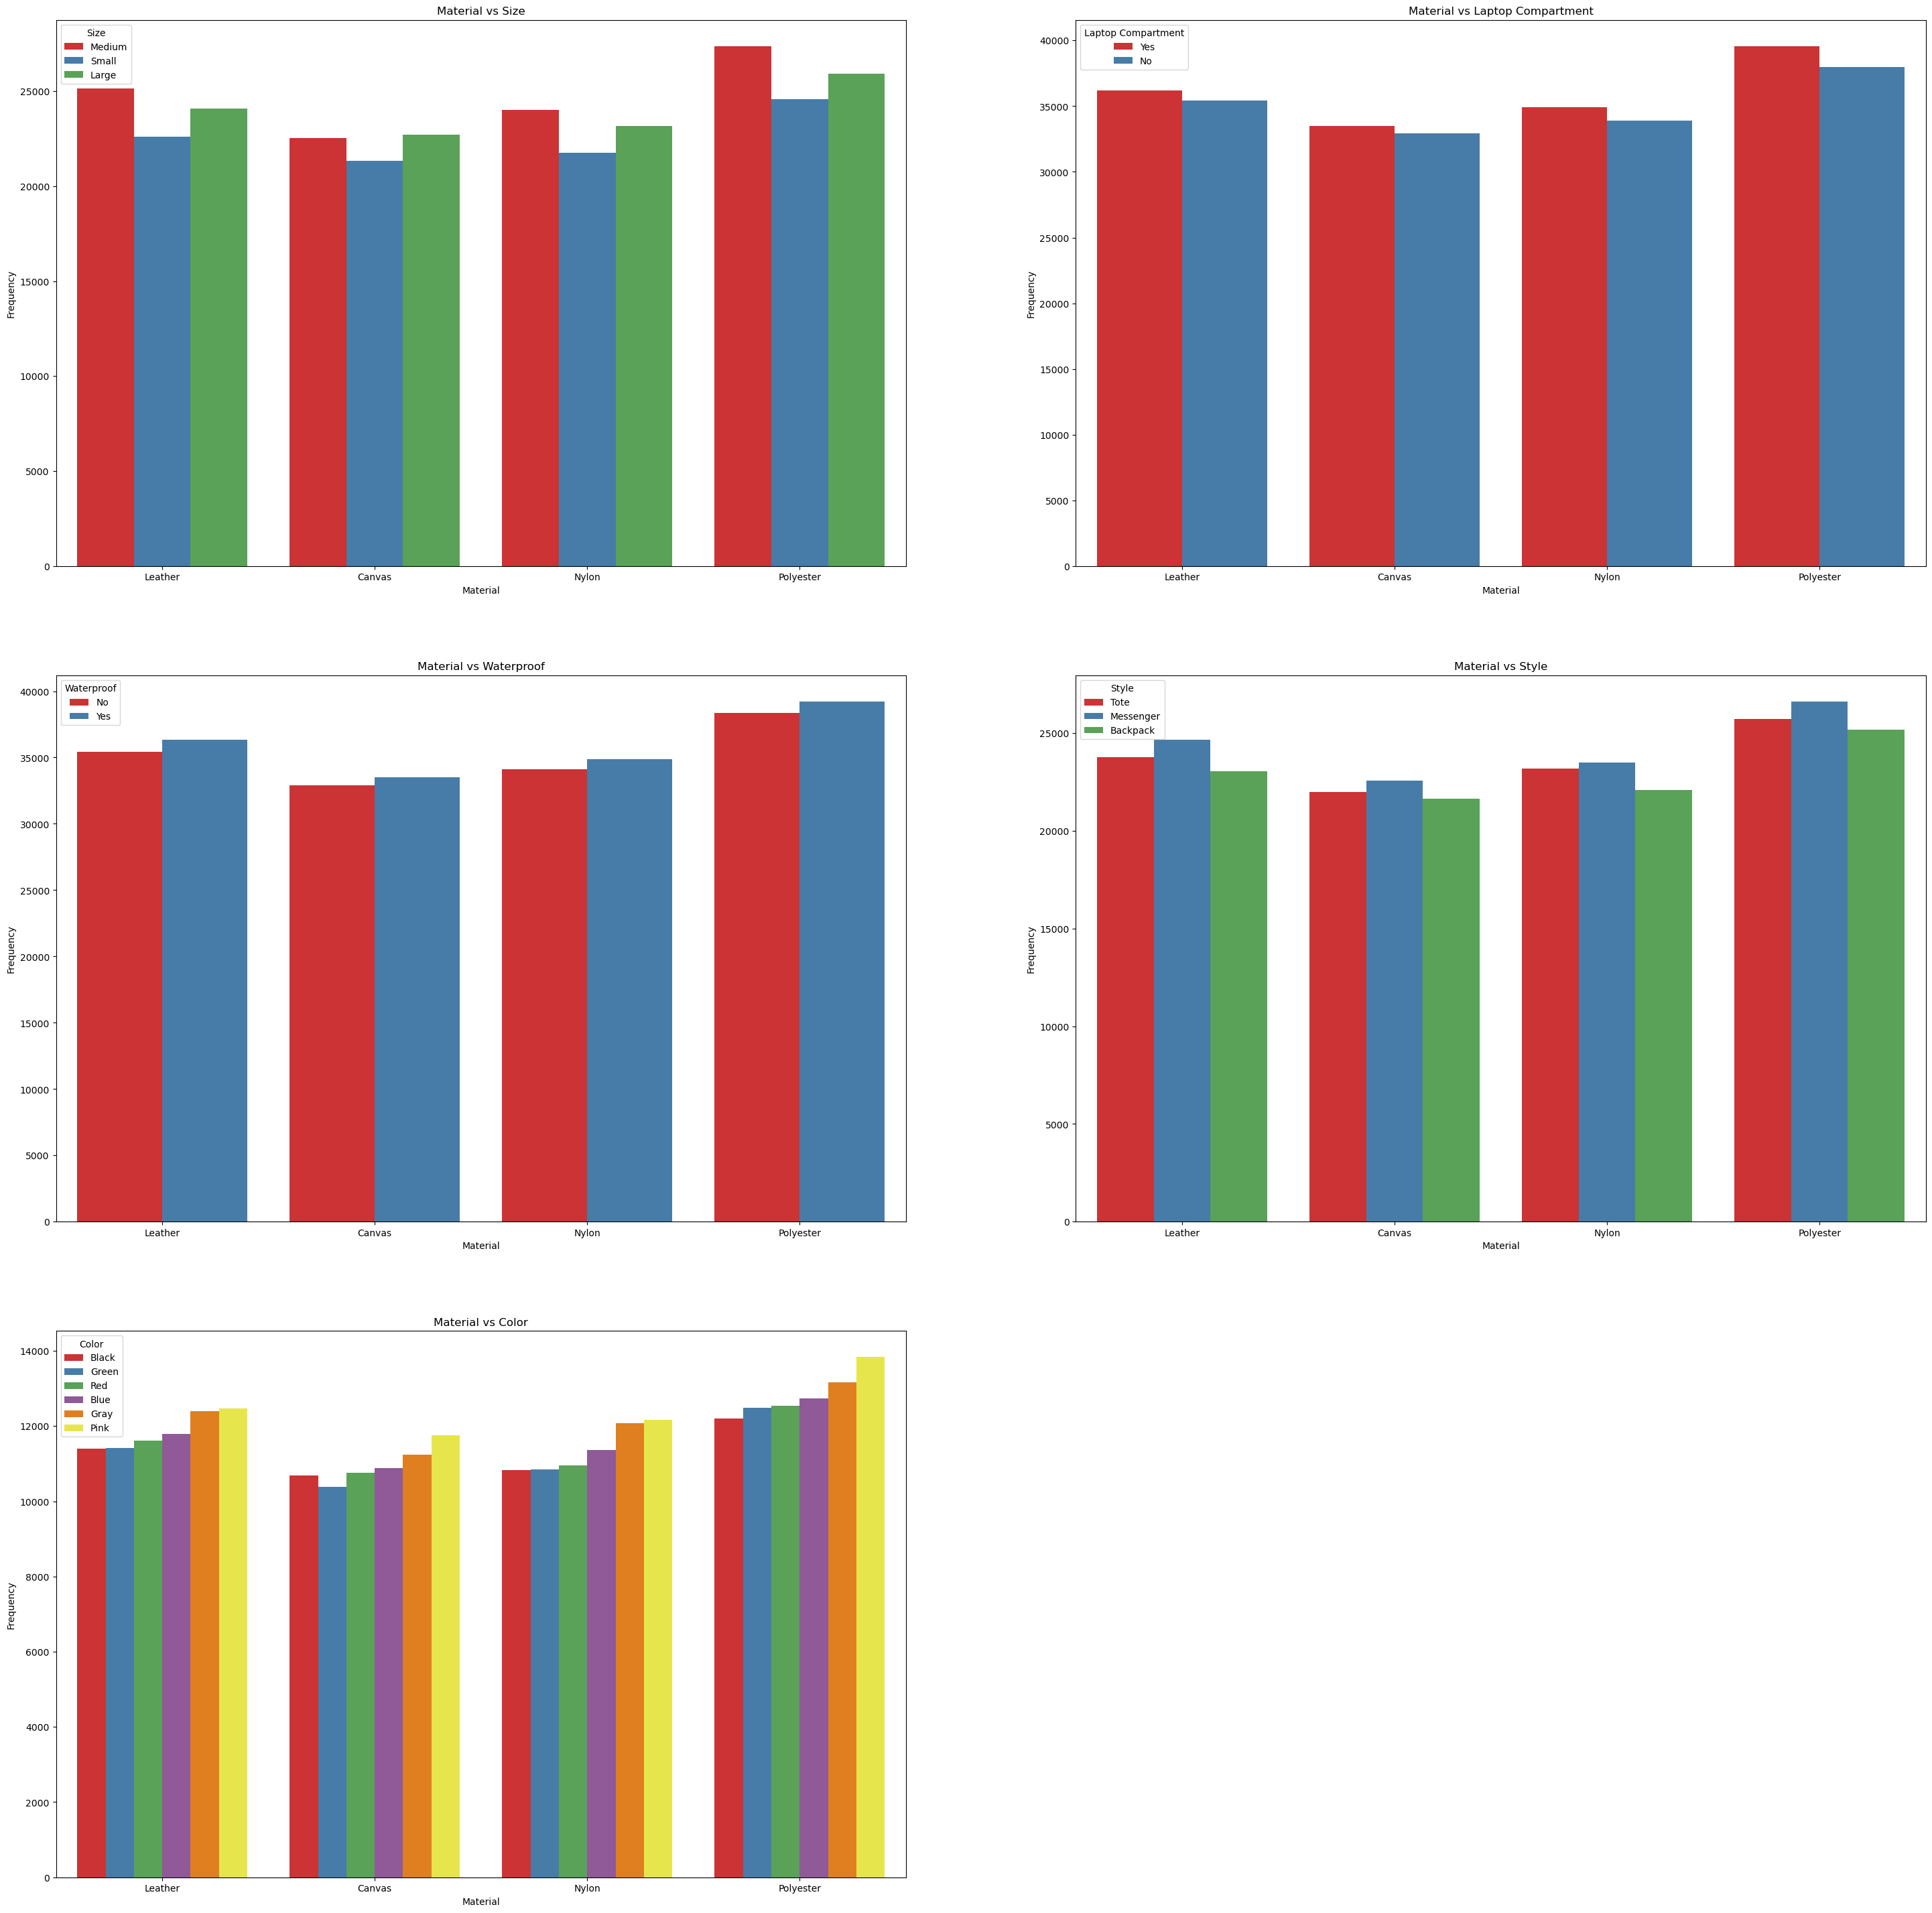

In [79]:
categorical_drop_material = categorical_drop_brand.copy()
categorical_drop_material.remove('Material')
plot_categorical_categorical(df, 'Material', categorical_drop_material)

1. Material và Size
 - Polyestee và Leather sản xuất số lượng Medium lớn nhiều hơn những chất liệu còn lại.
 - Tỉ lệ Medium luôn dẫn đầu mọi chất liệu, tuy nhiên chỉ có Canvas sản xuất số lượng Large nhiều hơn Medium bởi chất liệu vải dày, tải trọng lớn.
 - Chất liệu có ảnh hưởng rõ rệt đến kích cỡ chiếc cặp.
2. Material vs Laptop Compartment
 - Các chất liệu đa số dành cho cặp có ngăn đựng laptop.
 - Với Polyester chuyên sản xuất số lượng cặp có ngăn nhiều hơn những chất liệu còn lại.
 - Có ảnh hưởng nhưng không đáng kể giữa chất liệu và việc có ngăn đựng laptop.
3. Material vs Waterproof
 - Loại cặp thấm nước luôn được ưu tiên bởi các loại chất liệu sản xuất.
 - Canvas và Nylon có số lượng sản xuất ít hơn một tí tuy nhiên nhìn chung tỉ lệ giữa các chất liệu vẫn ngang nhau.
 - Không có ảnh hưởng đáng kể giữa chất liệu và khả năng chống nước, nghĩa là các chất liệu đều có thể sản xuất cặp chống nước..
4. Material vs Style
 - Polyester sản xuất số lượng Messenger nhỉnh hơn tất cả.
 - Tỉ trọng của các kiểu dáng như nhau ở các chất liệu ngoại trừ Nylon có số lượng túi Tote nhỉnh hơn tỷ trọng trung bình đôi chút.
 - Có ảnh hưởng nhỏ giữa chất liệu và kiểu dáng, nhưng không quá rõ rệt.
5. Material và Color
 - Các chất liệu ưu tiên sử dụng cho các loại cặp có màu hồng.
 - Các màu sắc nhìn chung có tỷ trọng giữa các chất liệu đồng đều với nhau, tuy nhiên với Nylon và Leather có số lượng cặp màu đen xấp xỉ màu xanh lá và số lượng cặp màu nâu xấp xỉ cặp màu hồng.
 - Có ảnh hưởng nhất định giữa chất liệu và màu sắc, đặc biệt ở một vài chất liệu như Nylon và Leather.

Material có ảnh hưởng rõ rệt đến Size và Color, trong khi ảnh hưởng đến các đặc trưng còn lại là không đáng kể.

Size

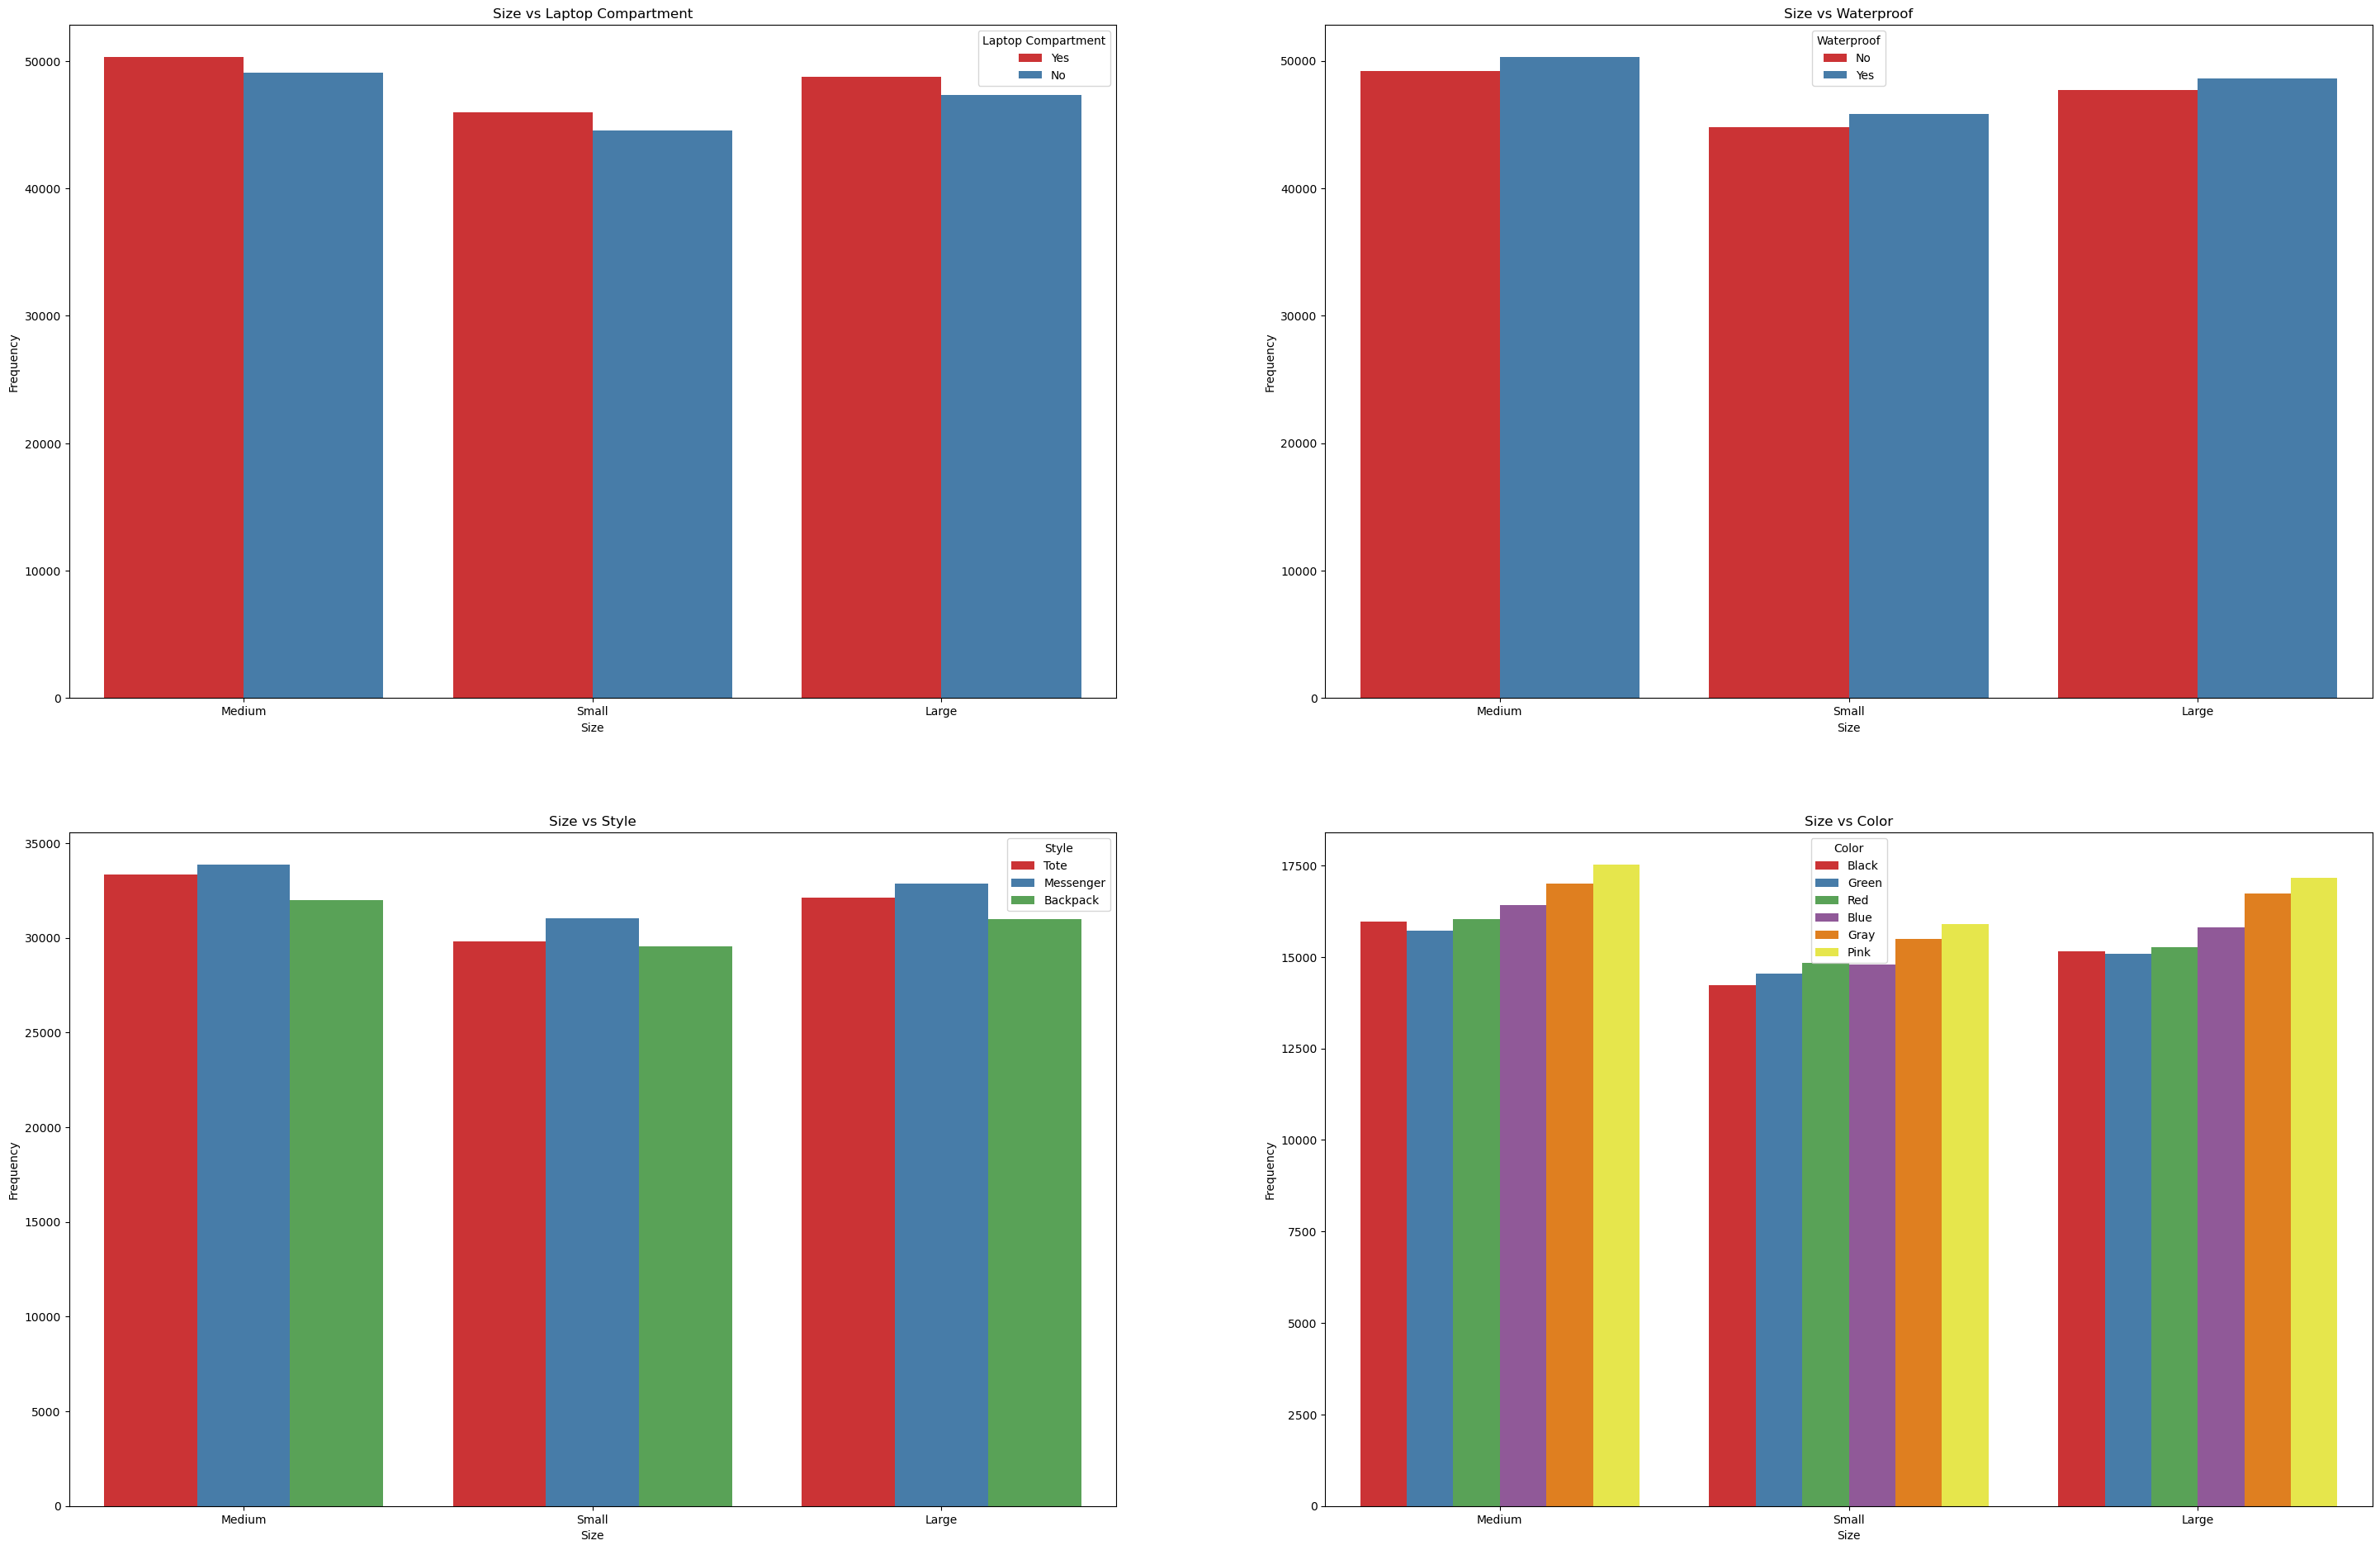

In [80]:
categorical_drop_size = categorical_drop_material.copy()
categorical_drop_size.remove('Size')
plot_categorical_categorical(df, 'Size', categorical_drop_size)

1. Size vs Laptop Compartment
 - Đa số các kích cỡ đều ưu tiên có ngăn đựng laptop.
 - Tỉ trọng giữa hai loại cặp ổn định giữa các kích cỡ.
 - Kích cỡ không ảnh hưởng đến việc có ngăn laptop hay không.
2. Size vs Waterproof
 - Đa số các kích cỡ đều ưu tiên việc không thấm nước.
 - Tỉ trọng giữa hai loại cặp ổn định giữa các kích cỡ.
 - Kích cỡ không ảnh hưởng đến sự thấm nước của cặp.
3. Size vs Style.
 - Số lượng các kiểu dáng của Large và Medium gần như là ngang nhau về số lượng lẫn tỉ trọng.
 - Số lượng Small thấp nhất nhưng tỉ trọng của Mesenger lớn hơn hai kích cỡ còn lại.
 - Kích cỡ có ảnh hưởng nhẹ đến kiểu dáng.
4. Size vs Color
 - Đối với loại cặp Small, màu đen không được ưa chuộng và có tỷ trọng thấp nhất trọng loại cặp này. Tuy nhiên với loại cặp Medium và Large, màu đen được ưa chuộng nhỉnh hơn, thậm chí gần bằng màu đỏ.
 - Màu xanh được ưa chuộng hơn màu đỏ ở loại Small nhưng với Medium và Large thì ngược lại.
 - Size có ảnh hưởng đáng kể đến Color.

 Size có ảnh hưởng khá mạnh đến Color tuy nhiên không ảnh hưởng gì đến các đặc trưng khác.

Waterproof

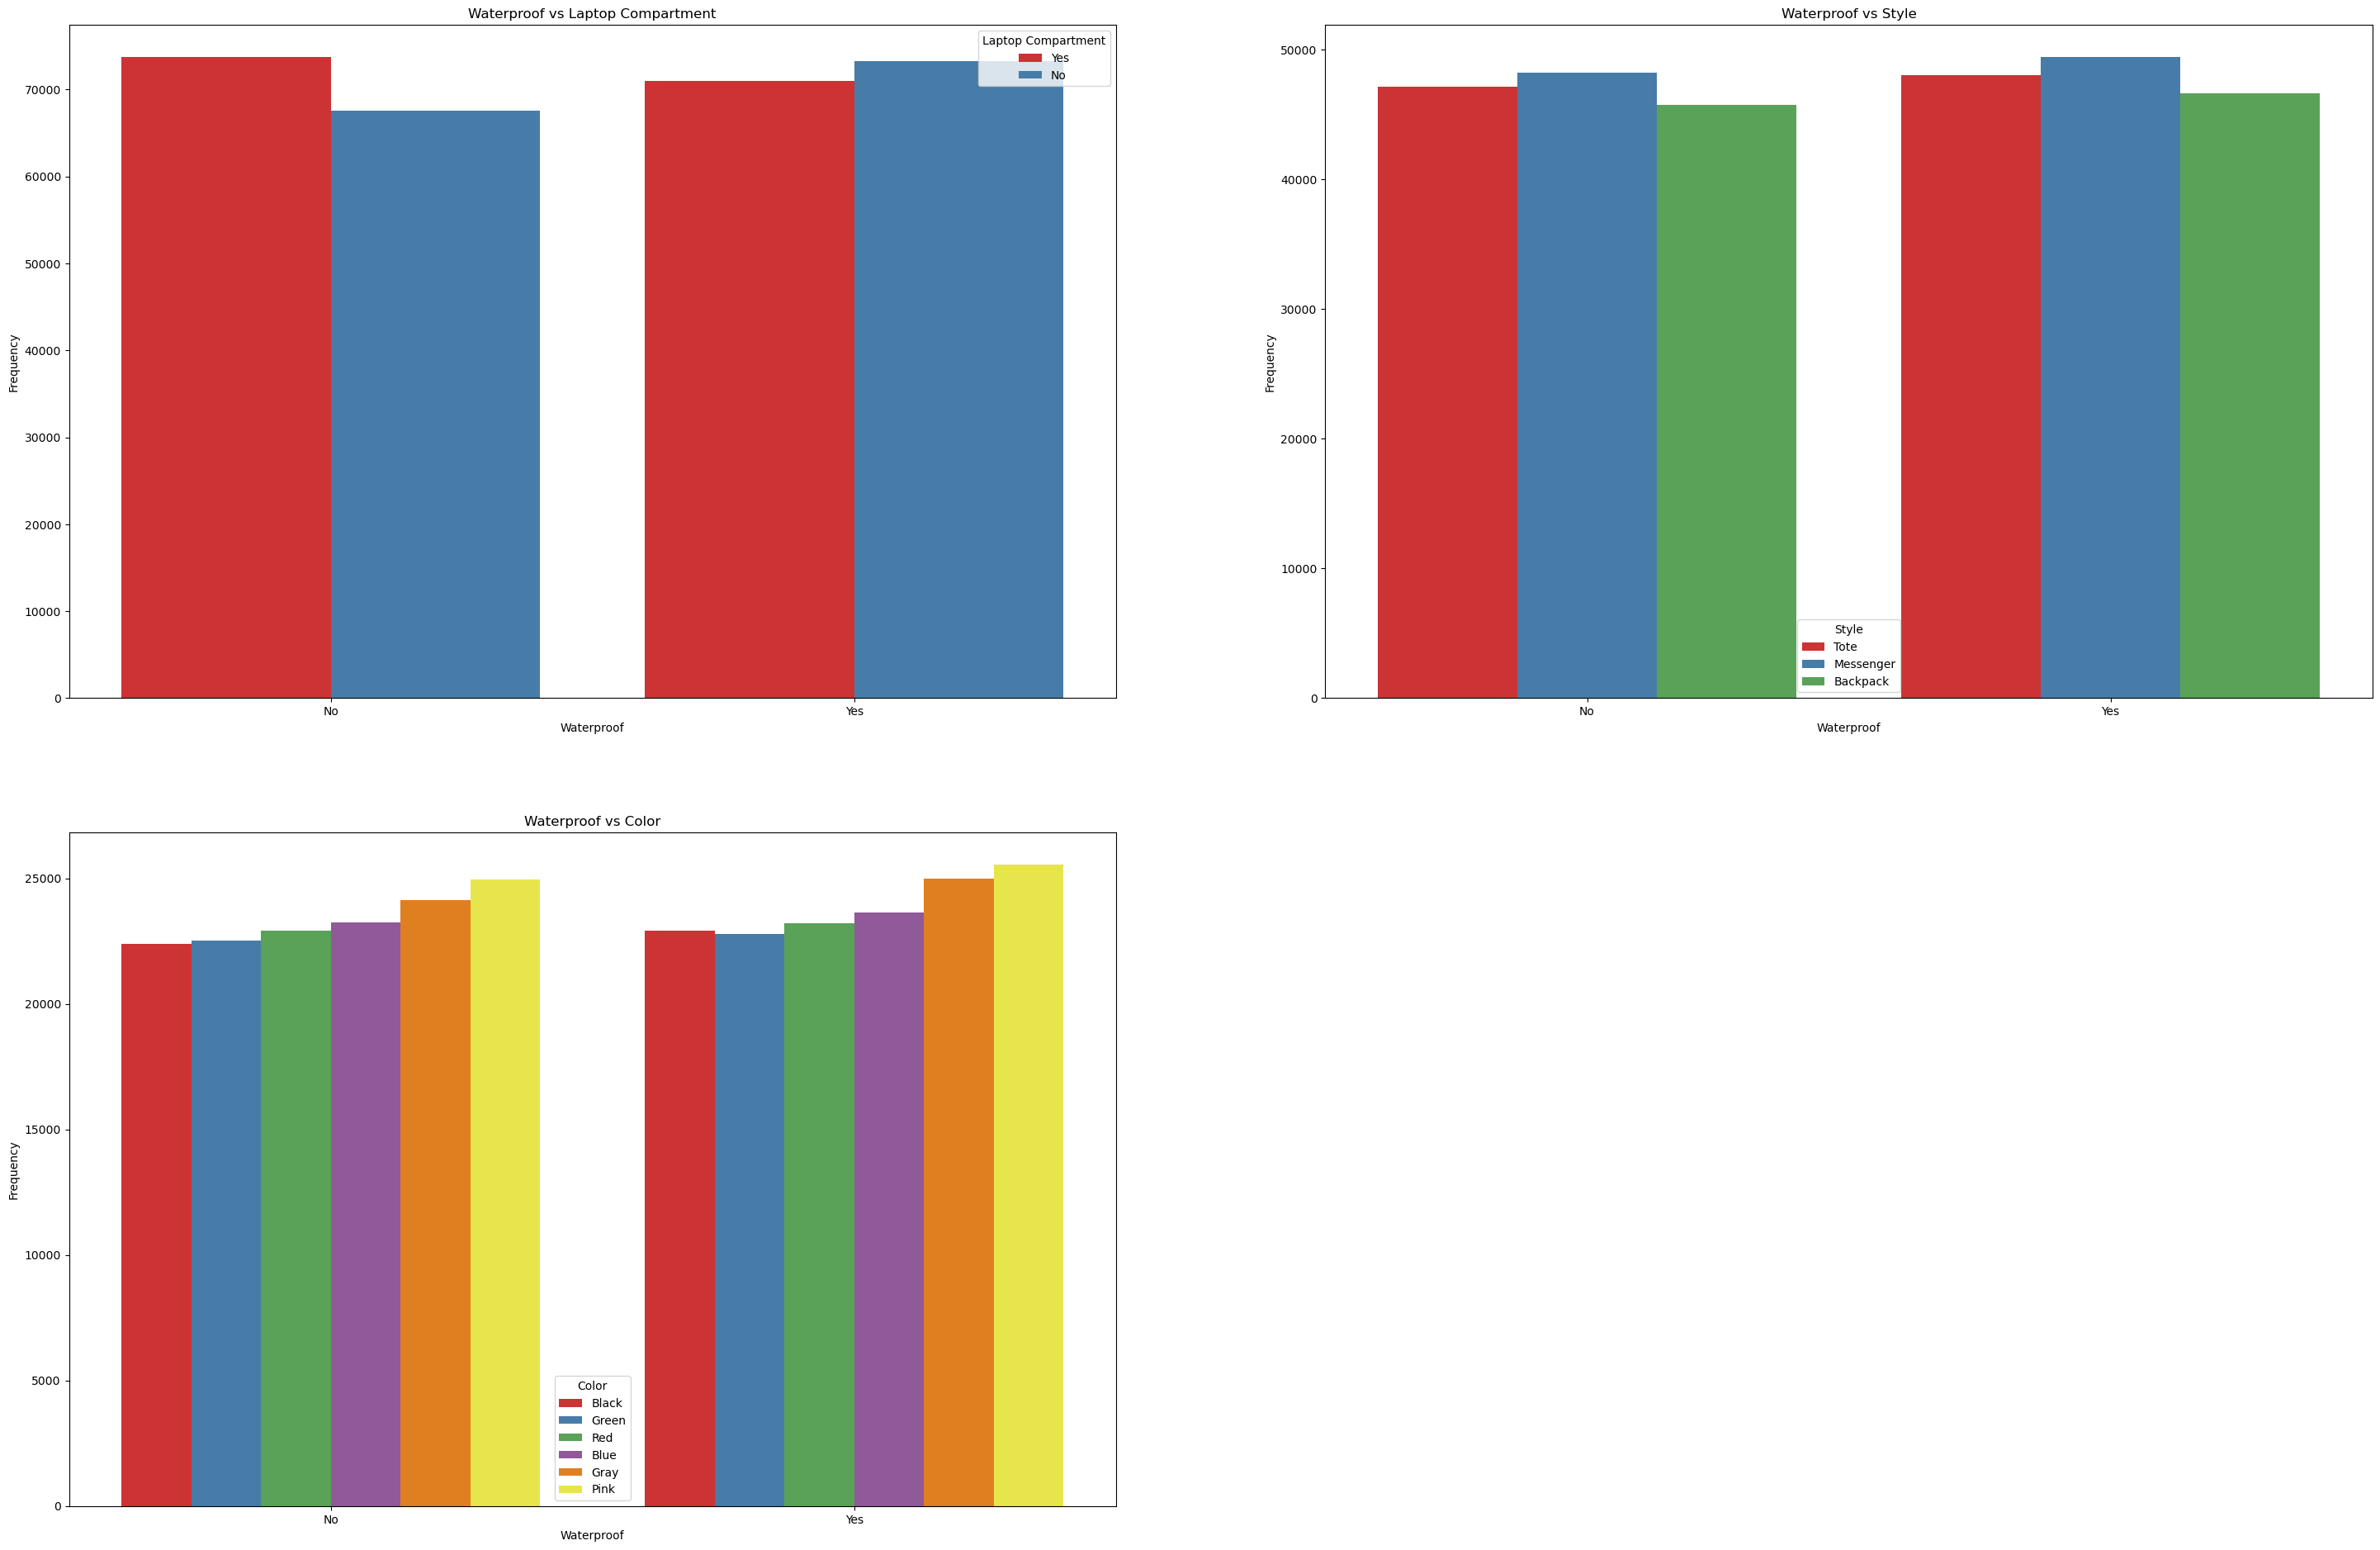

In [81]:
categorical_drop_waterproof = categorical_drop_size.copy()
categorical_drop_waterproof.remove('Waterproof')
plot_categorical_categorical(df, 'Waterproof', categorical_drop_waterproof)

1. Waterproof vs Laptop Compartment
 - Túi có khả năng chống nước thường có ngăn đựng laptop với tần suất cao hơn so với túi không chống nước.

 - Những chiếc túi chống nước có thể được thiết kế để phục vụ dân công sở hoặc người dùng mang theo thiết bị điện tử, đòi hỏi ngăn đựng laptop.

2. Waterproof vs Style
 - Cả ba kiểu dáng túi (Tote, Messenger, Backpack) đều có số lượng khá đồng đều giữa loại chống nước và không chống nước. Tuy nhiên, Messenger và Backpack có xu hướng hơi nghiêng về loại chống nước.

 - Túi đeo vai và ba lô thường được sử dụng ngoài trời hoặc cho mục đích di chuyển nhiều nên việc chống nước trở nên quan trọng hơn.

3. Waterproof vs Color
 - Màu sắc có sự phân bổ khá đều giữa hai nhóm (có và không chống nước). Tuy nhiên các màu như Peach, Orange, Gray có tần suất cao hơn trong loại chống nước.

 - Có thể những màu này phổ biến hơn trong dòng sản phẩm chống nước hoặc được ưa chuộng khi chọn túi bền, dùng ngoài trời.

Có mối liên hệ khá rõ giữa tính năng chống nước và sự hiện diện của ngăn đựng laptop.

Một vài xu hướng kiểu dáng và màu sắc cũng thể hiện sự liên quan đến tính năng chống nước, nhưng không mạnh mẽ bằng laptop compartment.

Laptop Compartment

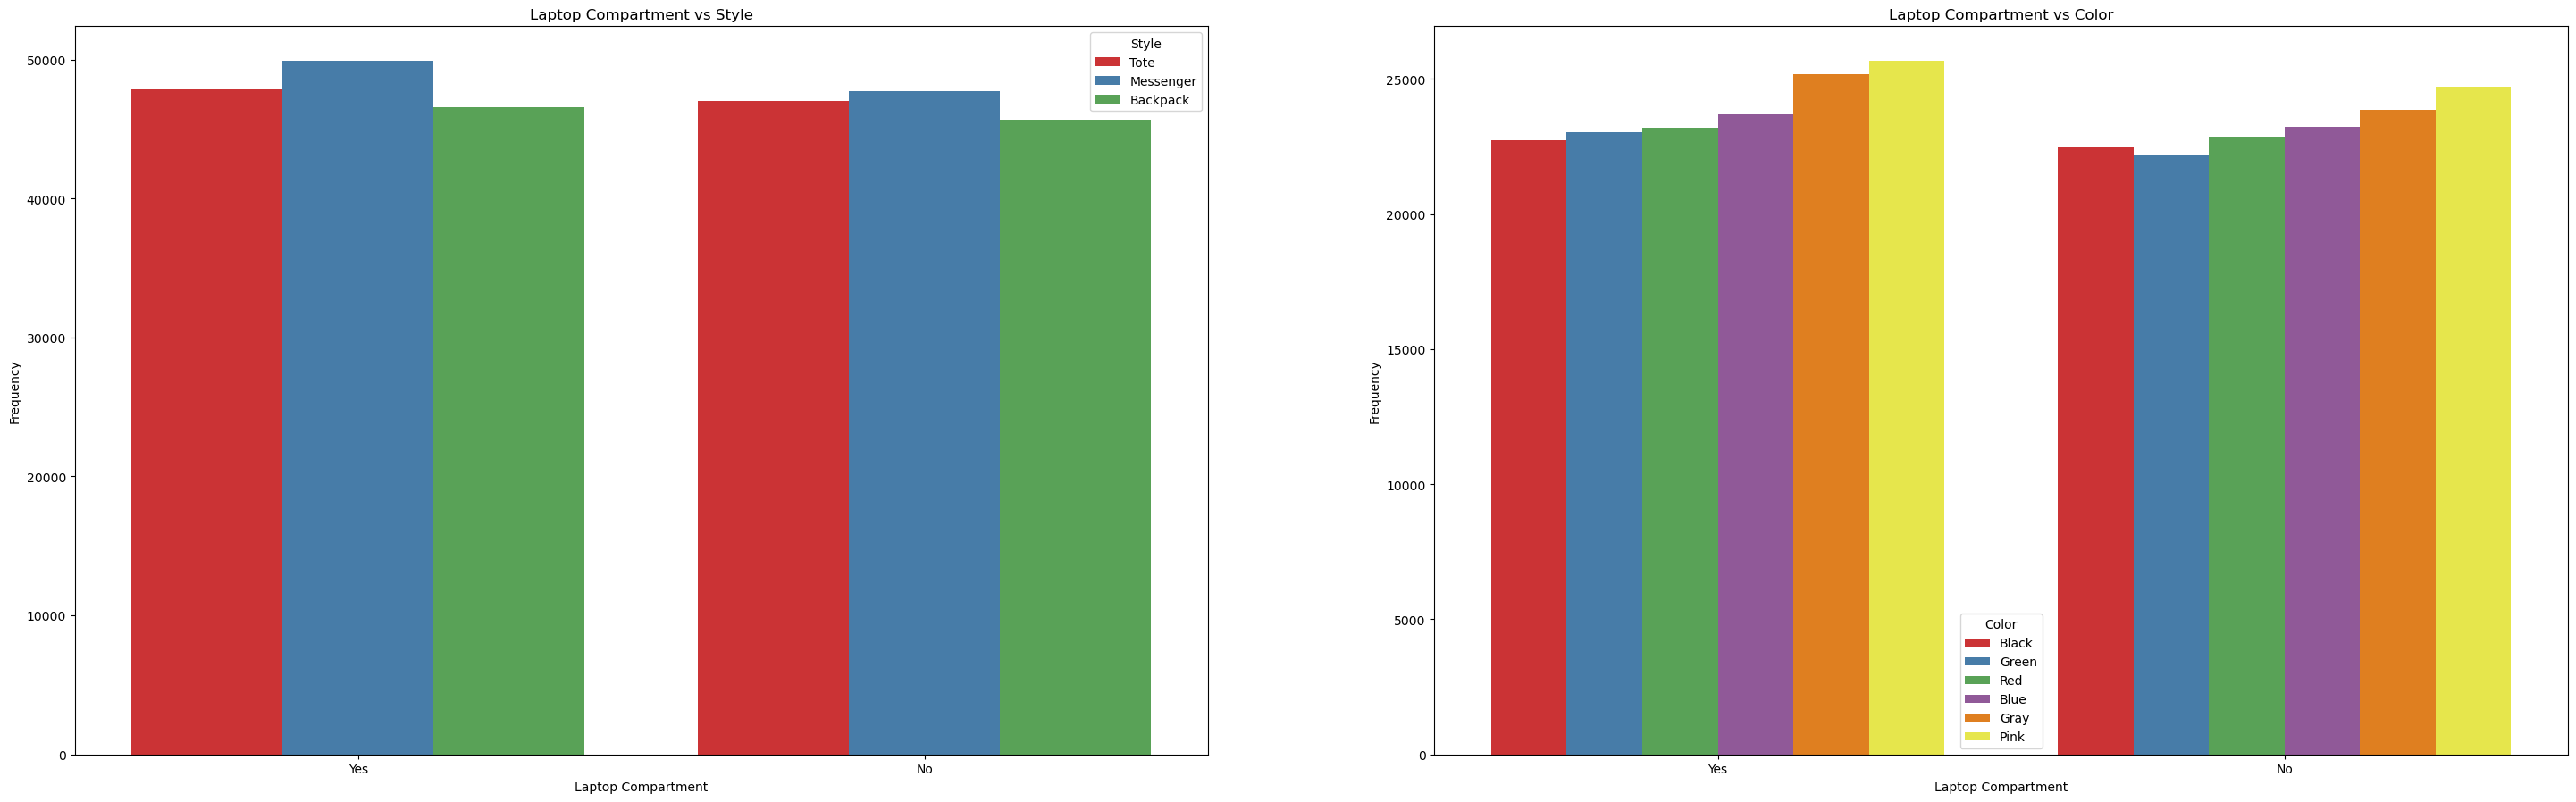

In [82]:
categorical_drop_laptop = categorical_drop_waterproof.copy()
categorical_drop_laptop.remove('Laptop Compartment')
plot_categorical_categorical(df, 'Laptop Compartment', categorical_drop_laptop)

1. Laptop Compartment vs Style
 - Cặp có khả năng chống thấm nước thường có số lượng kiểu dáng Messenger đáng kể có thể do tính tiện dụng và phù hợp với người dùng công sở hoặc học sinh – sinh viên.
 - Sự khác biệt giữa các kiểu dáng (Tote, Messenger, Backpack) không quá lớn, cho thấy kiểu dáng chỉ ảnh hưởng nhẹ đến khả năng có ngăn đựng laptop.
2. Laptop Compartment vs Color
 - Các mẫu cặp có ngăn laptop màu hồng và xám có số lượng tương đối cao, cho thấy có thể được người dùng ưu tiên hơn trong nhóm này.
 - Tỉ trọng cặp màu đen ở cặp không có ngăn laptop nhiều hơn tỉ trong cặp màu xanh lá, tuy nhiên ở loại cặp có ngăn laptop thì ngược lại
 - Màu sắc có ảnh hưởng nhẹ đến việc có ngăn laptop.

Màu sắc và kiểu dáng đều có ảnh hưởng nhẹ đến khả năng có ngăn đựng laptop trong thiết kế cặp.

Style

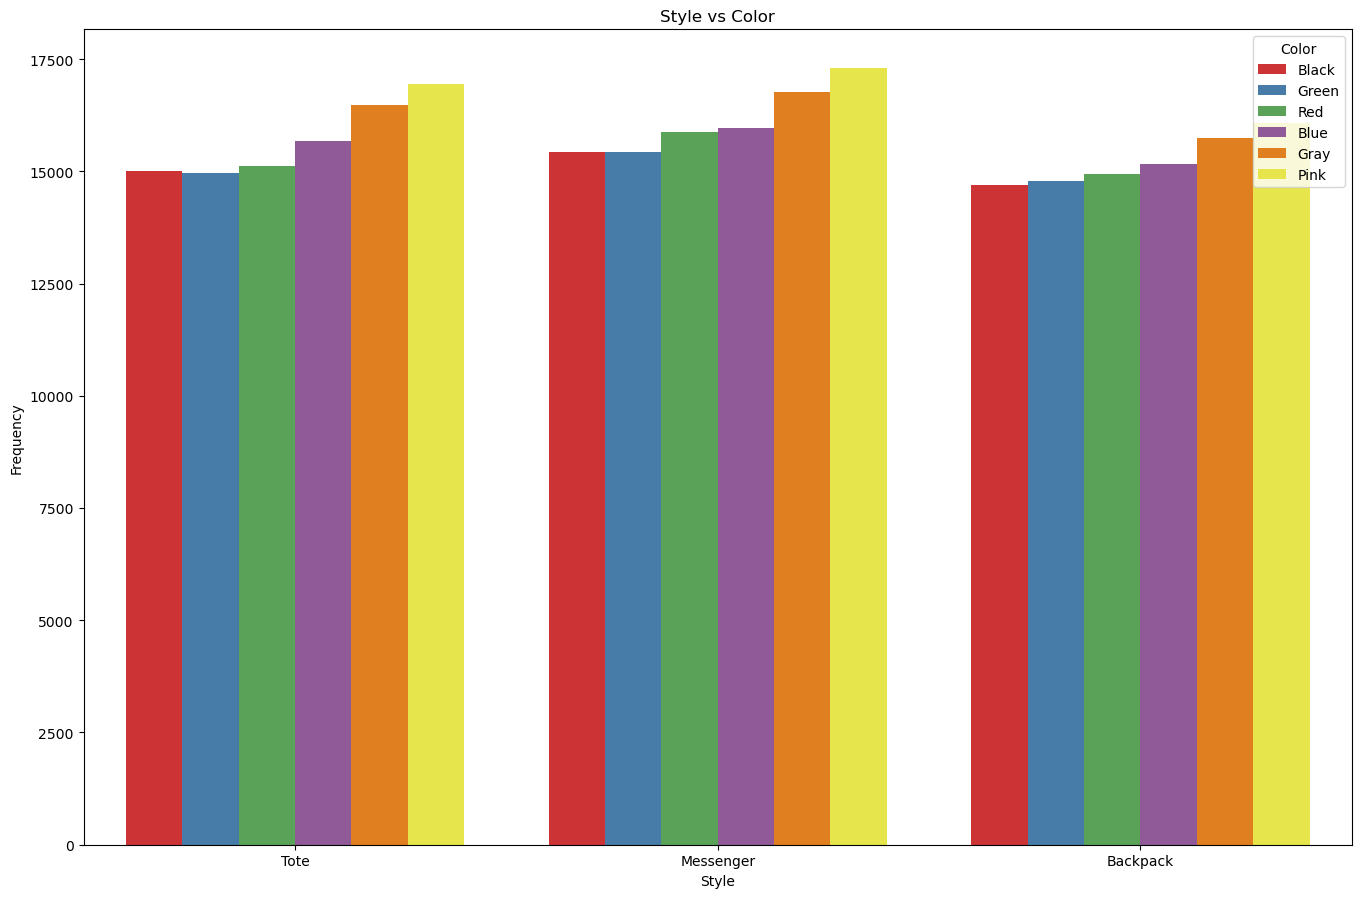

In [83]:
categorical_drop_style = categorical_drop_laptop.copy()
categorical_drop_style.remove('Style')
plot_categorical_categorical(df, 'Style', categorical_drop_style)

Mặc dù không có sự khác biệt cực lớn giữa các tổ hợp màu sắc và kiểu dáng, nhưng màu sắc vẫn có ảnh hưởng nhẹ đến sự ưa chuộng của từng kiểu cặp, đặc biệt là với màu hồng và xám được yêu thích hơn rõ rệt.

## Phân tích đa biến

### Phân tích ba biến

Style - Size - Price

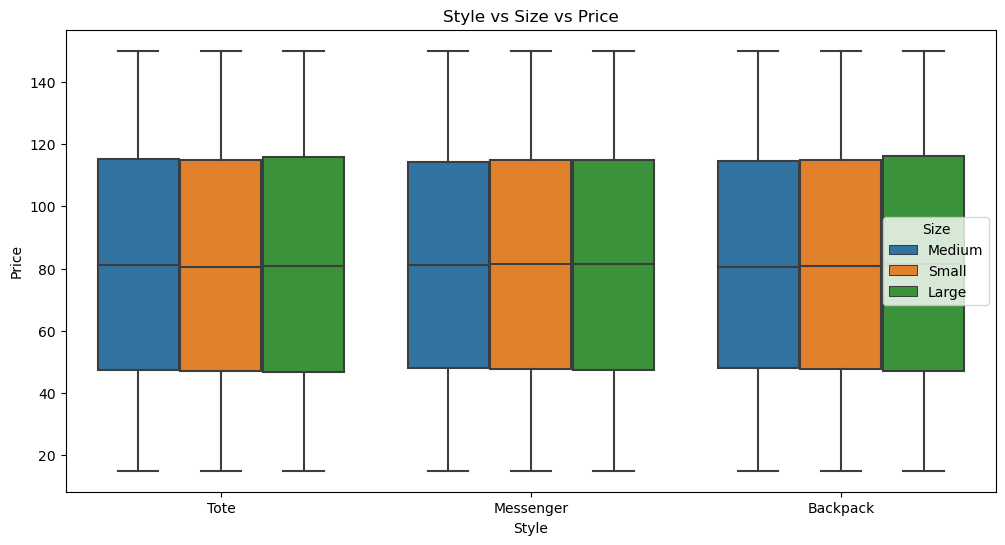

In [84]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Style', y='Price', hue='Size')
plt.title('Style vs Size vs Price')
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/style_size_price.png"), dpi=300, bbox_inches='tight')
plt.show()

Không có dấu hiệu tác động mạnh mẽ từ kiểu dáng và kích cỡ đến giá, phân bố khá đồng đều

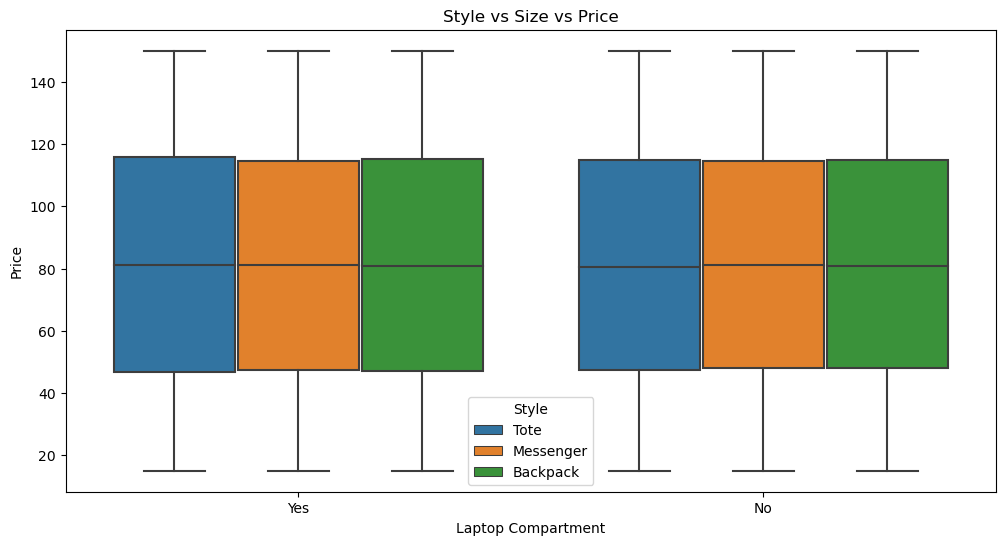

In [85]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Laptop Compartment', y='Price', hue='Style')
plt.title('Style vs Size vs Price')
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/lap_price_style.png"), dpi=300, bbox_inches='tight')
plt.show()

Tương tác giữa Laptop Compartment và Style không có tác động đáng kể đến giá, phân bố khá đồng đều.

Size - Compartments - Price

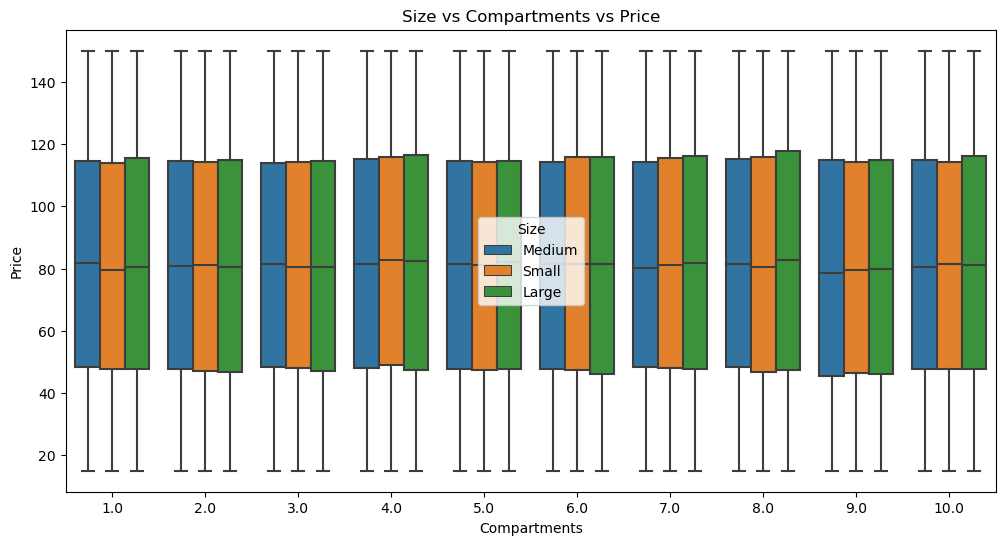

In [86]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Compartments', y='Price', hue='Size')
plt.title('Size vs Compartments vs Price')
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/size_com_price.png"), dpi=300, bbox_inches='tight')
plt.show()

### Ma trận tương quan

In [87]:
from sklearn.preprocessing import LabelEncoder

df_encoder = df.copy()
label_encoder = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df_encoder[col] = label_encoder.fit_transform(df[col])

df_encoder.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,1,1,1,7.0,1,0,2,0,11.611723,112.15875
1,1,1,0,2,10.0,1,1,1,3,27.078537,68.88056
2,2,4,1,2,2.0,1,0,1,5,16.643760,39.17320
3,3,2,2,2,8.0,1,0,1,3,12.937220,80.60793
4,4,0,0,1,1.0,1,1,1,3,17.749338,86.02312


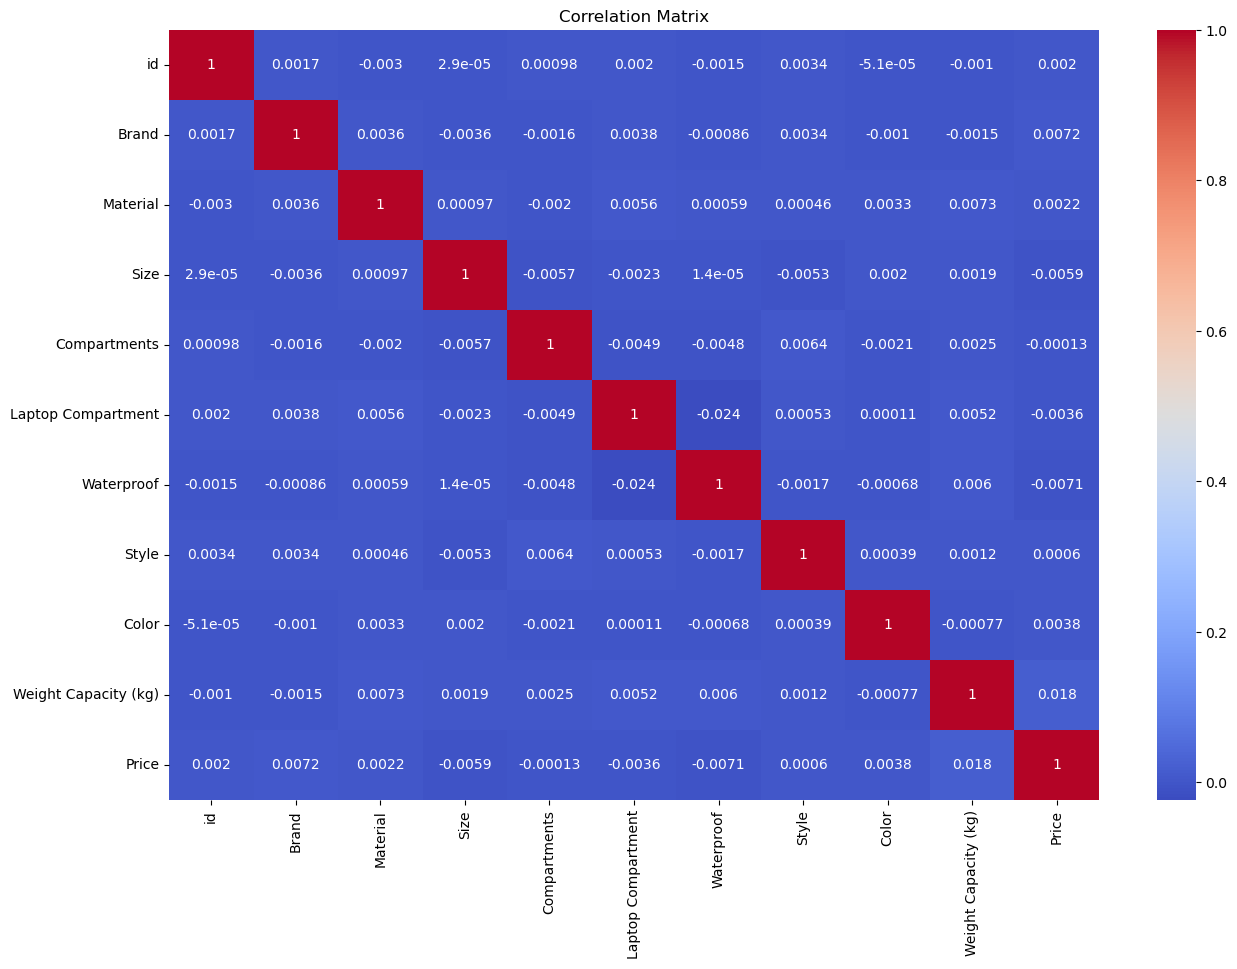

In [88]:
corr_matrix = df_encoder.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig(os.path.join(MODEL_DIR, "reports/eda/corr.png"), dpi=300)
plt.show()


Mối quan hệ giữa Price và các features khác là rất thấp, chắc chắn sẽ không có hiện tượng đa cộng tuyến giữa các features.
Các features hầu như độc lập với nhau (cao nhất là 0.024), cần phải huấn luyện mô hình phức tạp, xử lý phi tuyến tính tốt.
